In [666]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [667]:
df = pd.read_csv('df_final.csv')

In [668]:
df.set_index('Zone',inplace=True)
df.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        
Angola                                                      10.56        

                %_Exportations  %_Nourriture  %_Production  \
Zone                                                         
Afrique du Sud        2.888583     93.305823     76.432829   
Albanie               0.000000     92.156863     25.490196   
Algérie               0.000000     95.306859     99.277978   
Allemagne            27.419355     68.293718     64.261460   
Angola                0.000000     98.746082     13.166144   

                Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                               
Afrique du Sud                 9.016001                 1.105074   
Albanie                       13.175372                 0.000000   
Algérie                        0.048322                 0.000000   
Allemagne                     10.186501                 7.815297   
Angola                         9.290075                 0.000000   

                Rapport Production/Pop  Evo%_Import/Pop  Evo%_Export/Pop  \
Zone                                                                       
Afrique du Sud               29.240609         0.164938        -0.359247   
Albanie                       4.507364        -5.830877         0.002521   
Algérie                       6.644247         1.041509         0.000000   
Allemagne                    18.316346        -6.853765       -22.374989   
Angola                        1.408603        -0.267012         0.000000   

                distance  Political_Stability       PIB/Hab  
Zone                                                         
Afrique du Sud   8789.06                -0.28   6723.928582  
Albanie          1545.60                 0.38   4521.752217  
Algérie          2023.54                -0.92   4134.936055  
Allemagne         815.79                 0.59  44670.222282  
Angola           6574.32                -0.33   4042.681403

Tableau Corrélation Variable

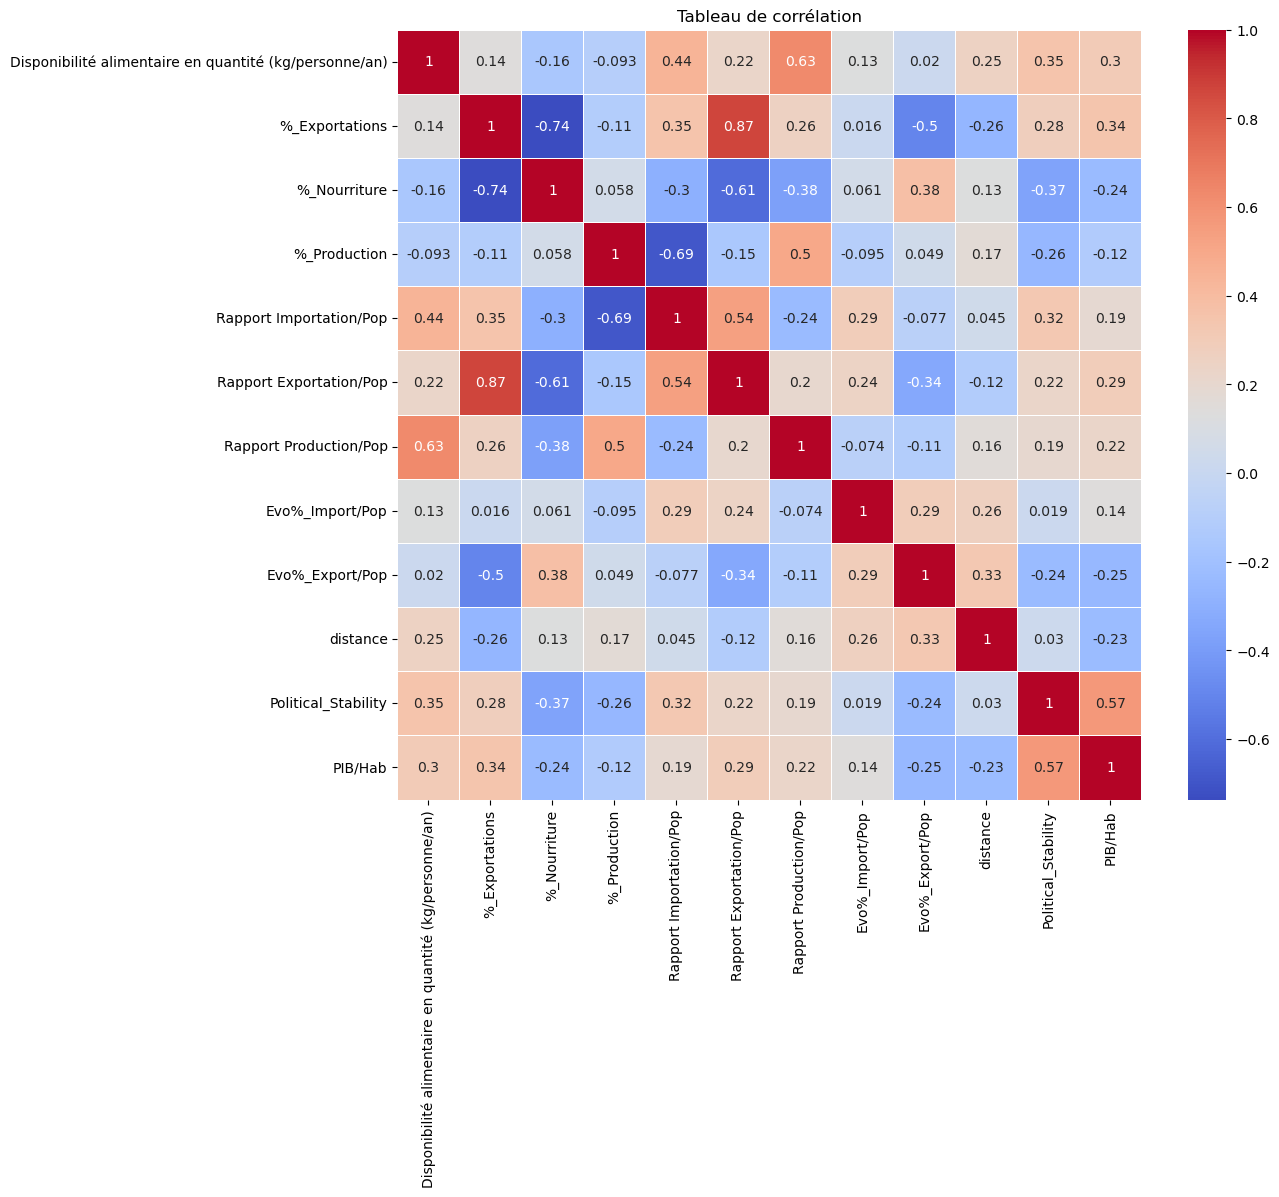

In [669]:
# Créer le tableau de corrélation
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Tableau de corrélation")
plt.show()

Standardisation des données

In [670]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [671]:
X

array([[ 0.91606314, -0.38747127,  0.60590604, ...,  0.85194546,
        -0.29795927, -0.47815564],
       [-0.42226622, -0.58494575,  0.53942025, ..., -1.03288622,
         0.45629334, -0.58700062],
       [-1.1132402 , -0.58494575,  0.7216981 , ..., -0.90852073,
        -1.02935574, -0.60611944],
       ...,
       [-0.70128678, -0.57929118,  0.78746184, ...,  1.18593214,
         0.35344071, -0.66260677],
       [-0.96438308, -0.58494575,  0.78156656, ..., -0.01292735,
        -3.33782584, -0.78022697],
       [-1.31817838, -0.47287397,  0.70868449, ...,  0.40752241,
         0.19344773, -0.73657955]])

ACP avec 12 composantes

In [672]:
component_number = 12
x_list = range(1, component_number+1)
names = df.index
columns_names = df.columns

In [673]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=component_number)
mypca.fit(X)

PCA(n_components=12)

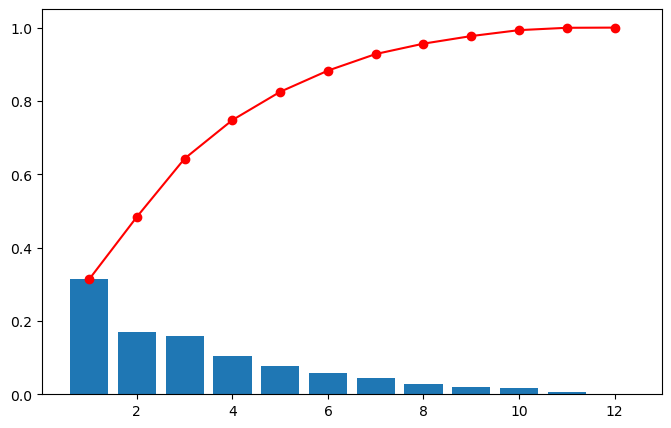

In [674]:
y = list(mypca.explained_variance_ratio_)

x = x_list

ycum = np.cumsum(y)

plt.figure(figsize=(8, 5))
plt.bar(x,y)

plt.plot(x,ycum,"-r", marker='o')

plt.show()

On peut estimer ques les 6 premières composantes sont les plus importantes car elles composent 90% de l'information

In [675]:
component_number = 6
mypca = PCA(n_components=component_number)
mypca.fit(X)
x_list = range(1, 7)

On refait l'ACP avec 6 composantes

In [676]:
pcs = mypca.components_
pcs[1:3]

array([[-0.06921996, -0.10049394,  0.16955464, -0.57379434,  0.47571161,
         0.02961144, -0.54344377,  0.27204228,  0.16870577,  0.00295247,
         0.03230524, -0.03302051],
       [ 0.50721069, -0.18969364,  0.09907218,  0.08901868,  0.13521306,
        -0.0436175 ,  0.32463188,  0.35428275,  0.37483601,  0.52151074,
         0.14567103,  0.06504838]])

In [677]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  0.238719  0.438019 -0.391233 -0.157702  0.310750  0.423822  0.174255   
1 -0.069220 -0.100494  0.169555 -0.573794  0.475712  0.029611 -0.543444   
2  0.507211 -0.189694  0.099072  0.089019  0.135213 -0.043617  0.324632   
3 -0.188747  0.289934 -0.208137  0.194599  0.064817  0.415019 -0.015816   
4  0.295902 -0.045573 -0.149116 -0.242759  0.257136 -0.084856  0.084259   
5  0.443093 -0.000697  0.249321 -0.082279  0.117093  0.069257  0.223658   

         7         8         9         10        11  
0  0.055733 -0.262032 -0.098301  0.308315  0.300294  
1  0.272042  0.168706  0.002952  0.032305 -0.033021  
2  0.354283  0.374836  0.521511  0.145671  0.065048  
3  0.329965  0.129689  0.201551 -0.496692 -0.457613  
4 -0.616792 -0.124808  0.232200 -0.059107 -0.543469  
5 -0.016839  0.176684 -0.609372 -0.509378  0.062494

In [678]:
features = df.columns
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs

Disponibilité alimentaire en quantité (kg/personne/an)  %_Exportations  \
F1                                           0.238719             0.438019   
F2                                          -0.069220            -0.100494   
F3                                           0.507211            -0.189694   
F4                                          -0.188747             0.289934   
F5                                           0.295902            -0.045573   
F6                                           0.443093            -0.000697   

    %_Nourriture  %_Production  Rapport Importation/Pop  \
F1     -0.391233     -0.157702                 0.310750   
F2      0.169555     -0.573794                 0.475712   
F3      0.099072      0.089019                 0.135213   
F4     -0.208137      0.194599                 0.064817   
F5     -0.149116     -0.242759                 0.257136   
F6      0.249321     -0.082279                 0.117093   

    Rapport Exportation/Pop  Rapport Production/Pop  Evo%_Import/Pop  \
F1                 0.423822                0.174255         0.055733   
F2                 0.029611               -0.543444         0.272042   
F3                -0.043617                0.324632         0.354283   
F4                 0.415019               -0.015816         0.329965   
F5                -0.084856                0.084259        -0.616792   
F6                 0.069257                0.223658        -0.016839   

    Evo%_Export/Pop  distance  Political_Stability   PIB/Hab  
F1        -0.262032 -0.098301             0.308315  0.300294  
F2         0.168706  0.002952             0.032305 -0.033021  
F3         0.374836  0.521511             0.145671  0.065048  
F4         0.129689  0.201551            -0.496692 -0.457613  
F5        -0.124808  0.232200            -0.059107 -0.543469  
F6         0.176684 -0.609372            -0.509378  0.062494

On affiche les composantes en fonction des variables

In [679]:
pcs.T

F1        F2  \
Disponibilité alimentaire en quantité (kg/perso...  0.238719 -0.069220   
%_Exportations                                      0.438019 -0.100494   
%_Nourriture                                       -0.391233  0.169555   
%_Production                                       -0.157702 -0.573794   
Rapport Importation/Pop                             0.310750  0.475712   
Rapport Exportation/Pop                             0.423822  0.029611   
Rapport Production/Pop                              0.174255 -0.543444   
Evo%_Import/Pop                                     0.055733  0.272042   
Evo%_Export/Pop                                    -0.262032  0.168706   
distance                                           -0.098301  0.002952   
Political_Stability                                 0.308315  0.032305   
PIB/Hab                                             0.300294 -0.033021   

                                                          F3        F4  \
Disponibilité alimentaire en quantité (kg/perso...  0.507211 -0.188747   
%_Exportations                                     -0.189694  0.289934   
%_Nourriture                                        0.099072 -0.208137   
%_Production                                        0.089019  0.194599   
Rapport Importation/Pop                             0.135213  0.064817   
Rapport Exportation/Pop                            -0.043617  0.415019   
Rapport Production/Pop                              0.324632 -0.015816   
Evo%_Import/Pop                                     0.354283  0.329965   
Evo%_Export/Pop                                     0.374836  0.129689   
distance                                            0.521511  0.201551   
Political_Stability                                 0.145671 -0.496692   
PIB/Hab                                             0.065048 -0.457613   

                                                          F5        F6  
Disponibilité alimentaire en quantité (kg/perso...  0.295902  0.443093  
%_Exportations                                     -0.045573 -0.000697  
%_Nourriture                                       -0.149116  0.249321  
%_Production                                       -0.242759 -0.082279  
Rapport Importation/Pop                             0.257136  0.117093  
Rapport Exportation/Pop                            -0.084856  0.069257  
Rapport Production/Pop                              0.084259  0.223658  
Evo%_Import/Pop                                    -0.616792 -0.016839  
Evo%_Export/Pop                                    -0.124808  0.176684  
distance                                            0.232200 -0.609372  
Political_Stability                                -0.059107 -0.509378  
PIB/Hab                                            -0.543469  0.062494

Tableau de corrélation entre les composantes et les variables

<Axes: >

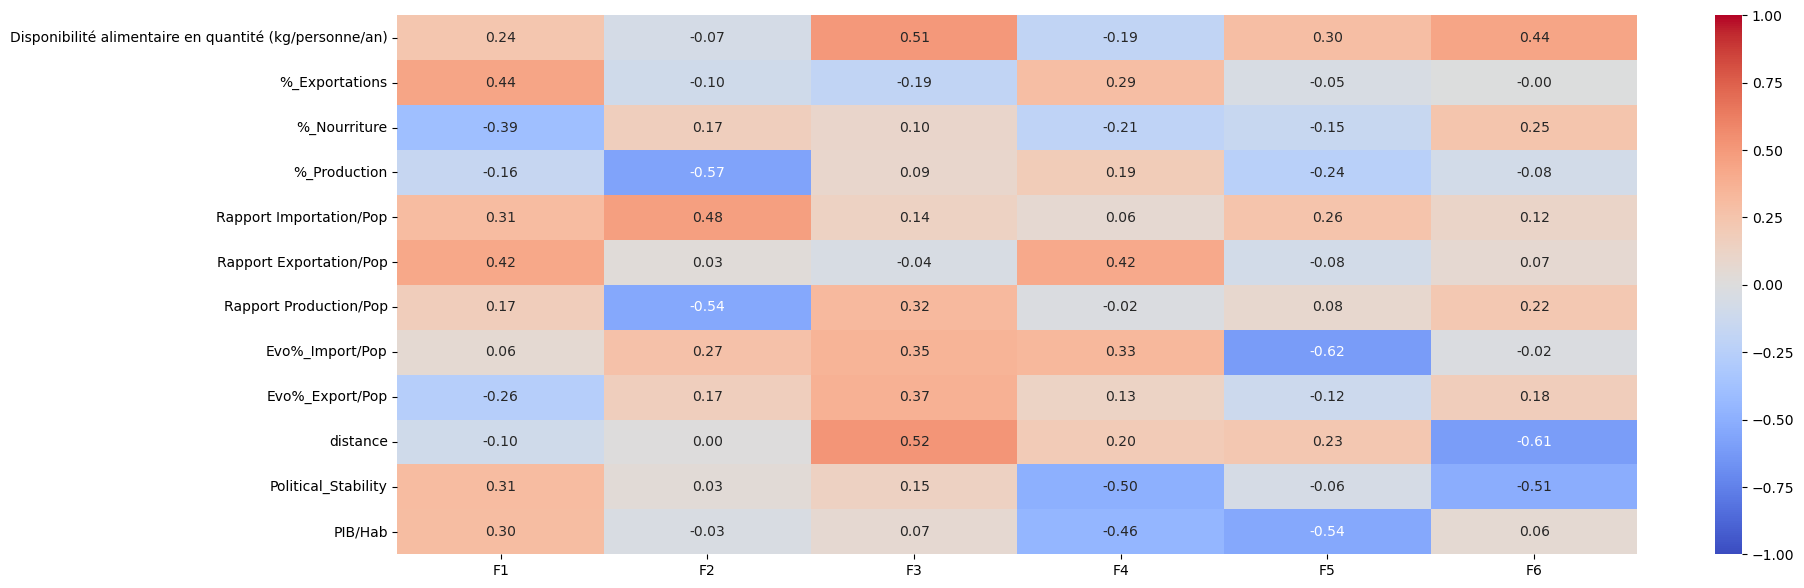

In [680]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

On défini la fonction pour créer les cercles de corrélation

In [681]:
def circle_corr(x, y, mypca, features):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, mypca.components_.shape[1]):
        ax.arrow(0,
                0,  # Start the arrow at the origin
                mypca.components_[x, i],  #0 for PC1
                mypca.components_[y, i],  #1 for PC2
                head_width=0.07,
                head_length=0.07, 
                width=0.02,              )

        plt.text(mypca.components_[x, i] + 0.05,
                mypca.components_[y, i] + 0.05,
                features[i])
        
    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*mypca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*mypca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

On affiche les cercles de corrélation pour F1-F2, F3-F4 et F5-F6

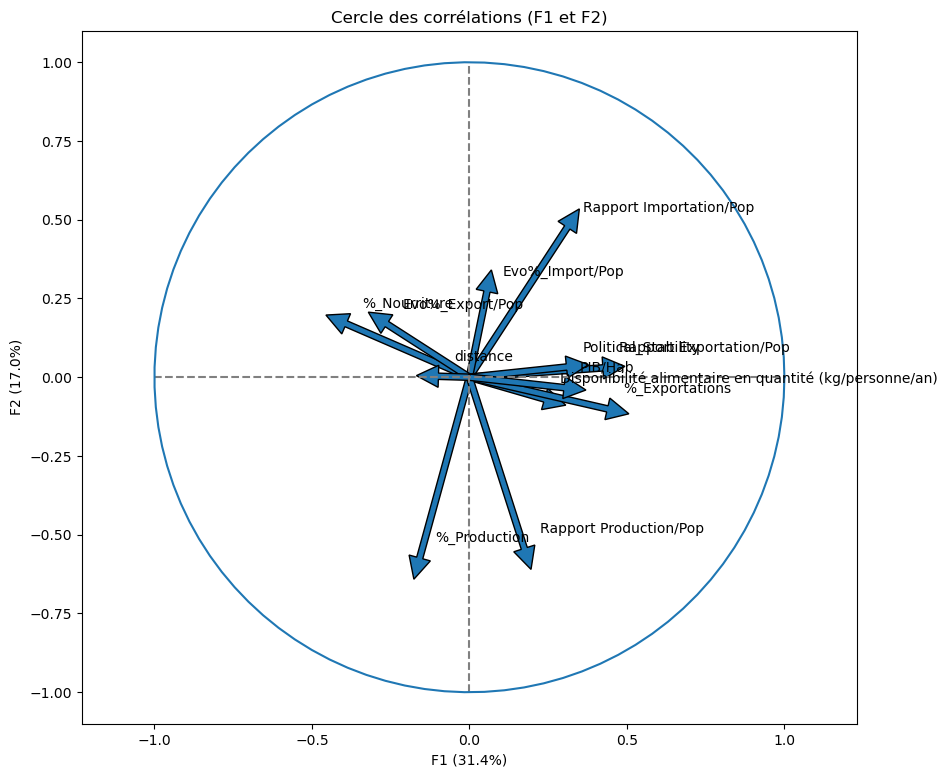

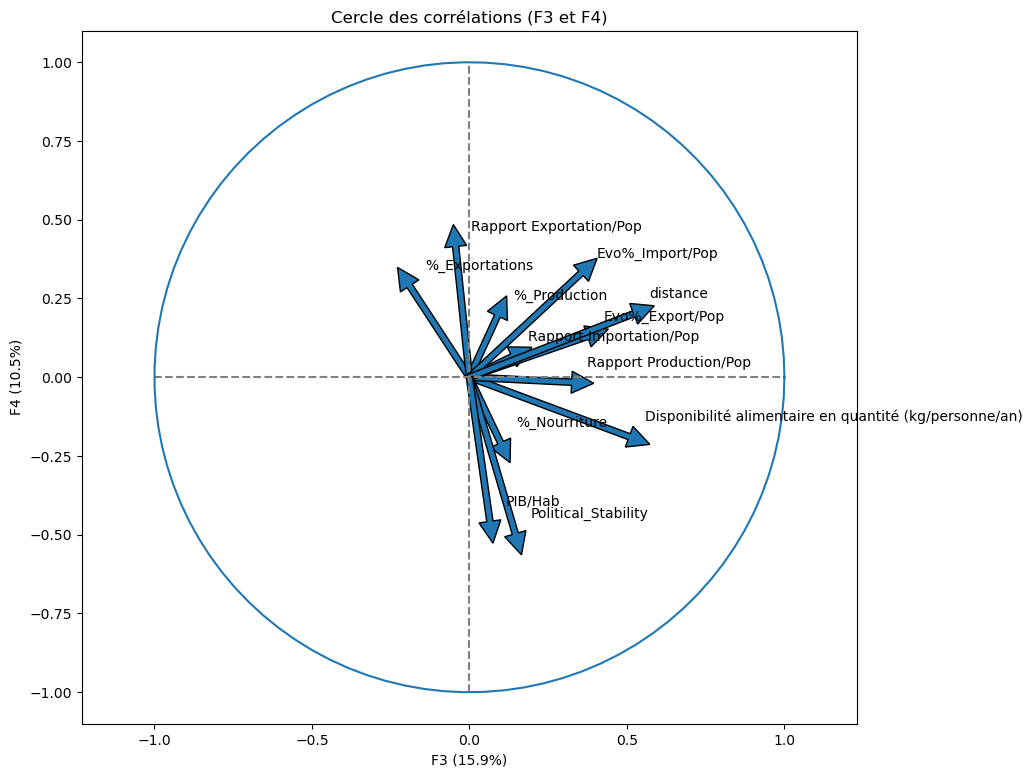

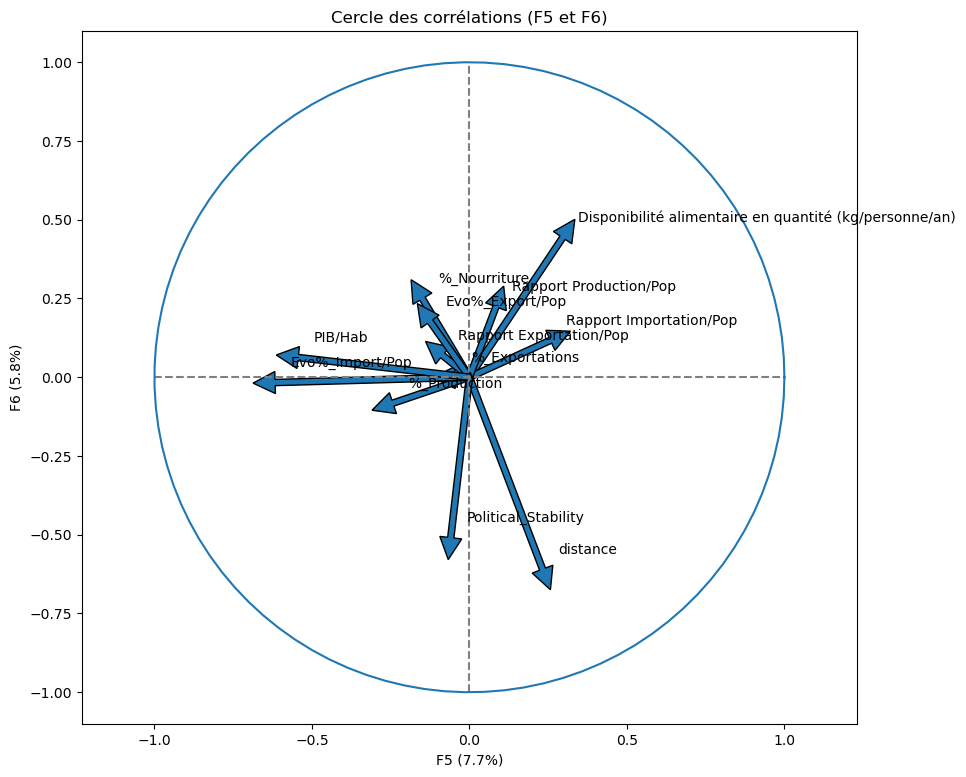

In [682]:
circle_corr(0, 1, mypca, features)
circle_corr(2, 3, mypca, features)
circle_corr(4, 5, mypca, features)

On créé la fonction pour afficher les plans factiorels

In [683]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set2", alpha=alpha)
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


In [684]:
X_proj = mypca.transform(X)
X_proj[1:3]

array([[-0.6232639 ,  1.55652056, -1.02346679, -0.93330365,  0.55912195,
         0.29332507],
       [-1.88618913,  0.01180729, -1.04669482,  0.63865946, -0.86513078,
         0.43565342]])

C:\Users\kilia\AppData\Local\Temp\ipykernel_22380\2538459840.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set2", alpha=alpha)


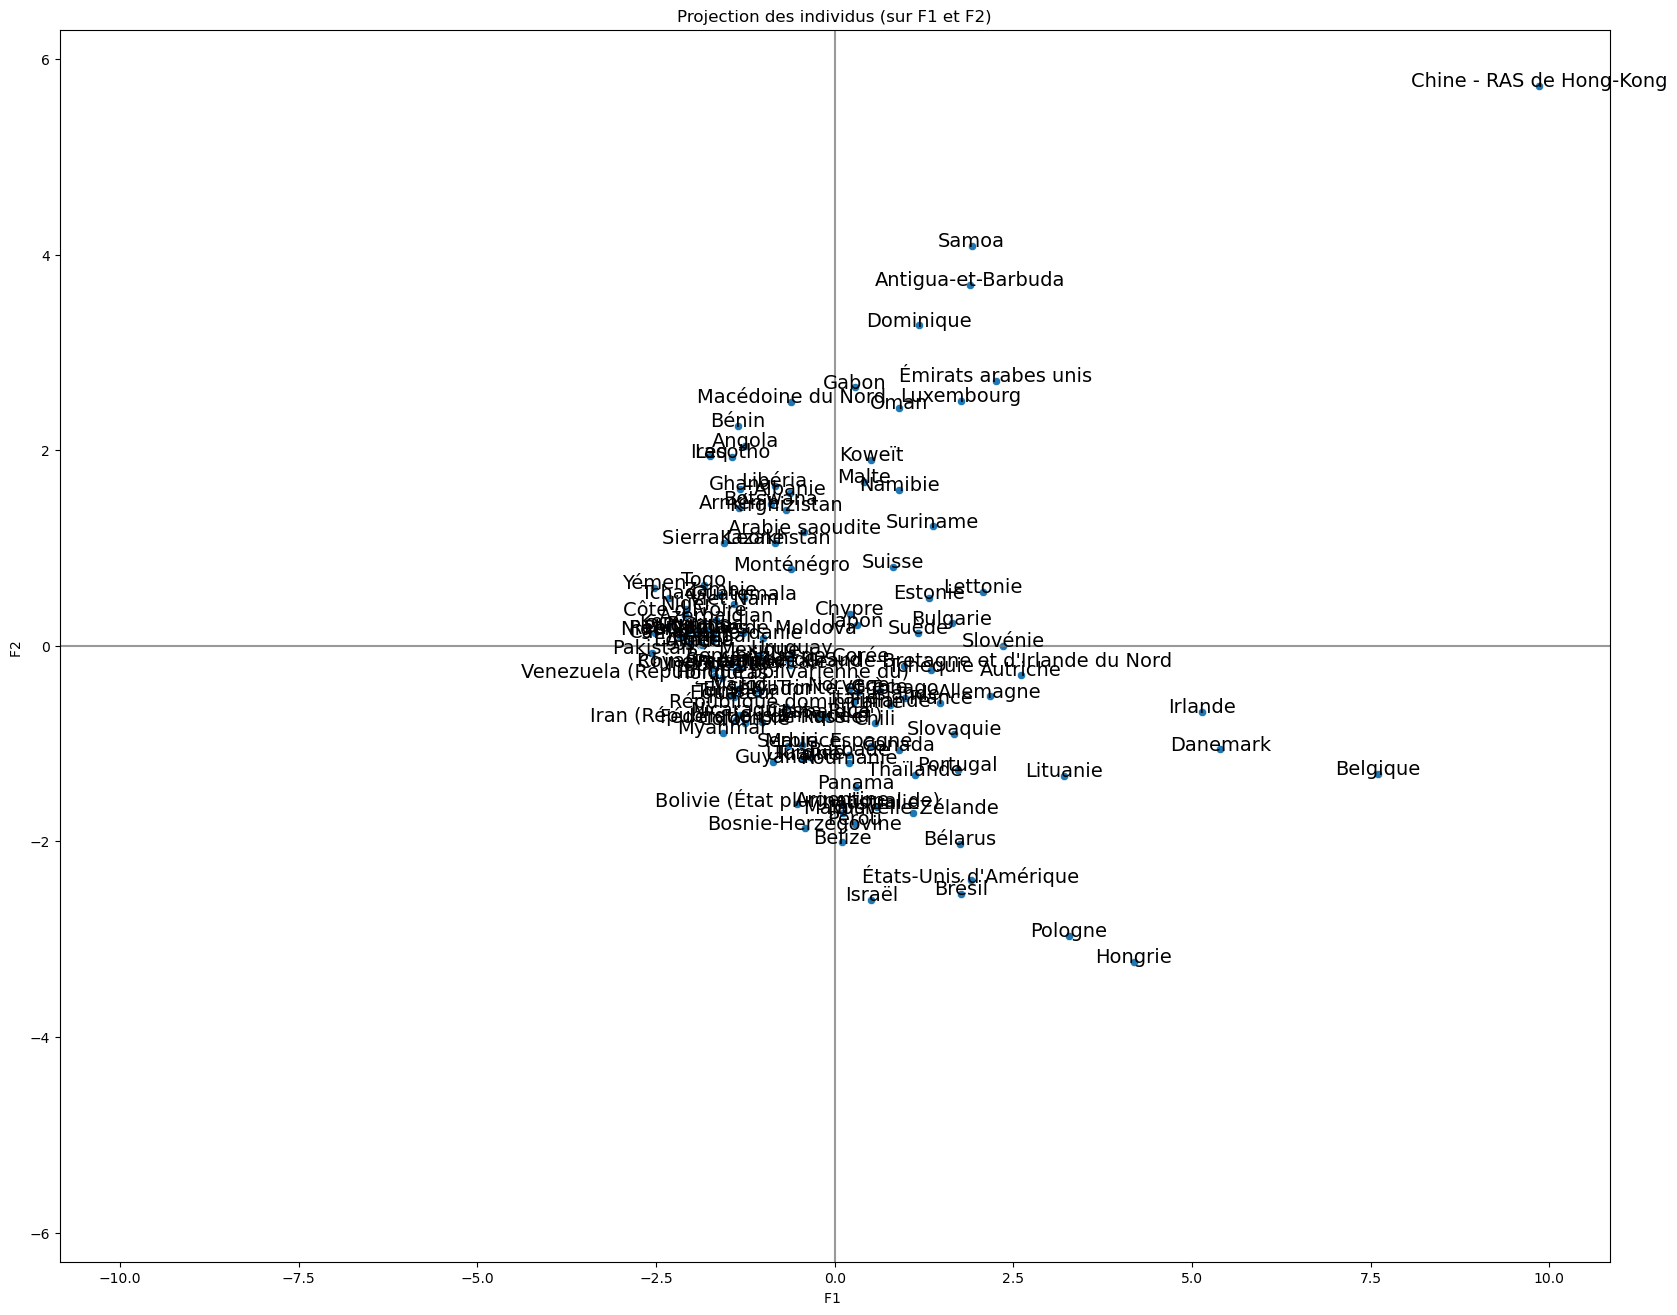

C:\Users\kilia\AppData\Local\Temp\ipykernel_22380\2538459840.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set2", alpha=alpha)


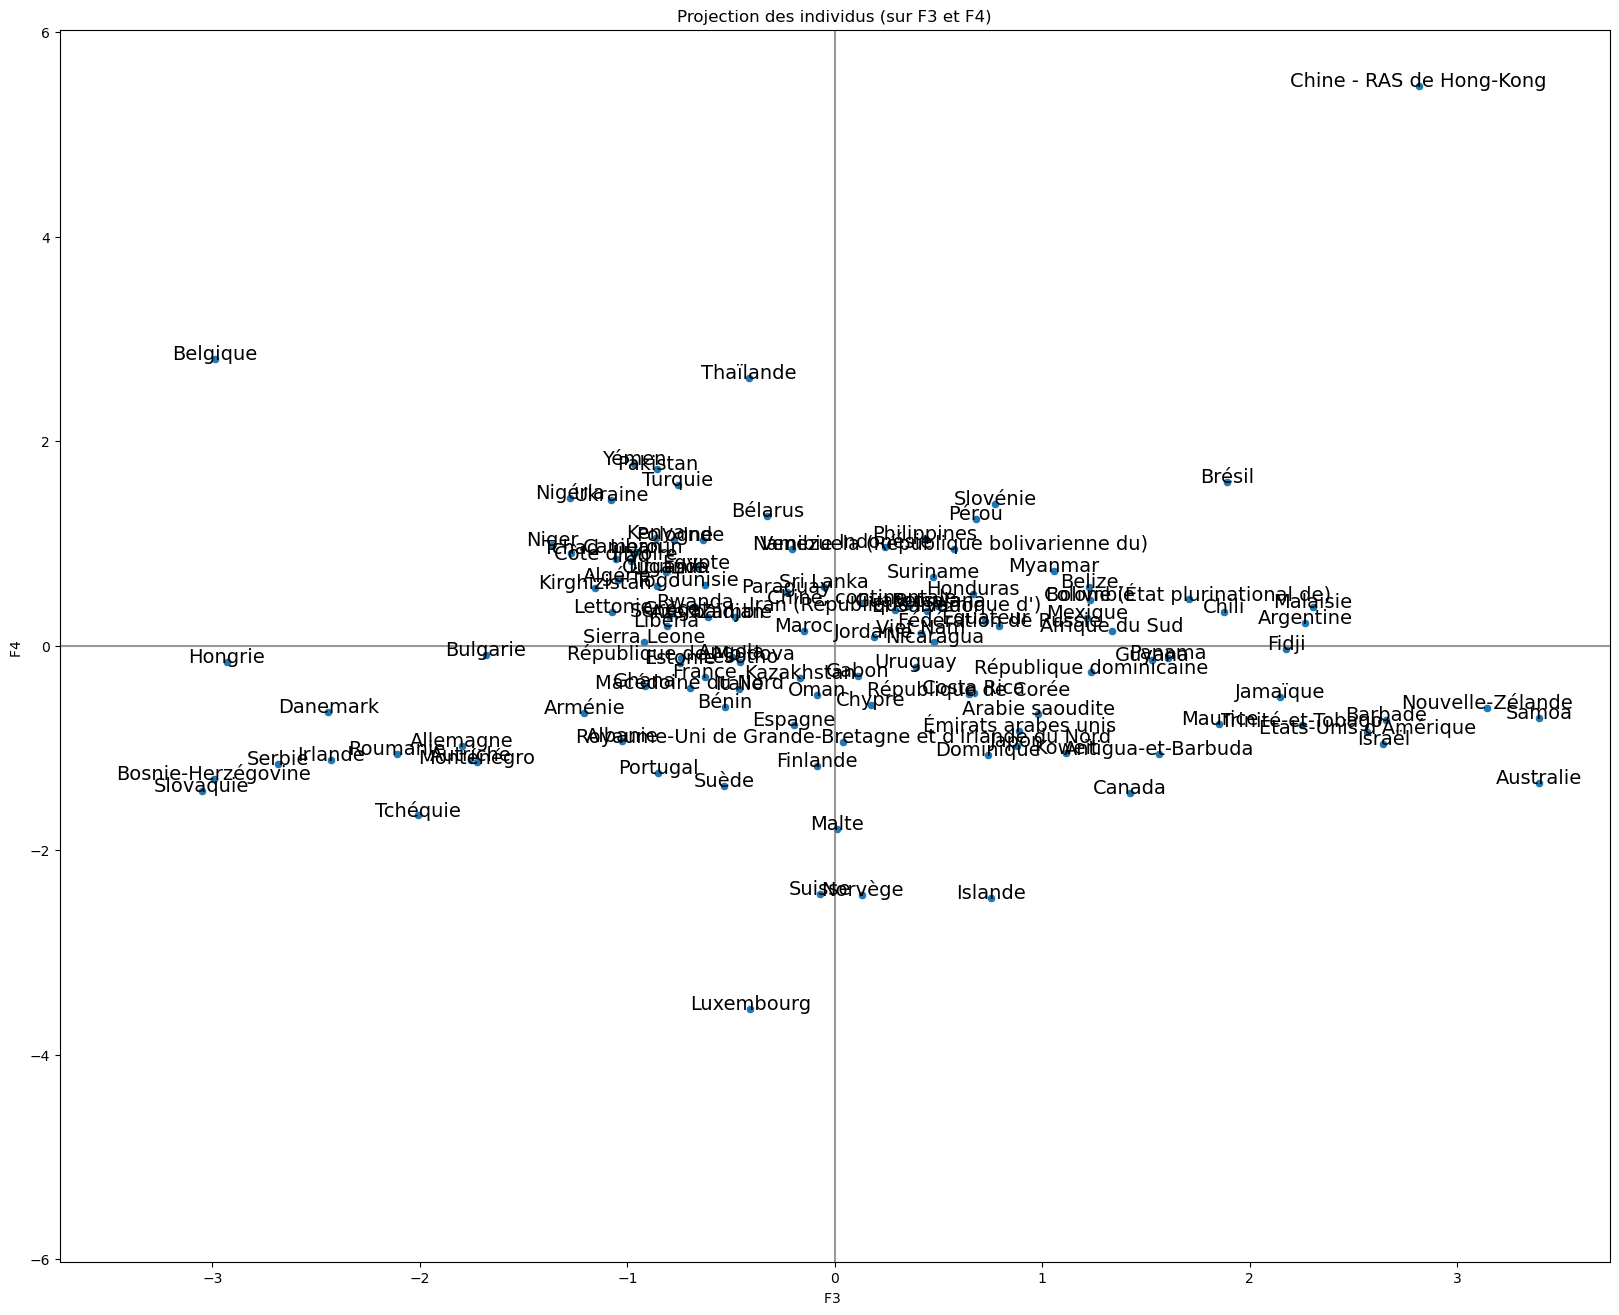

C:\Users\kilia\AppData\Local\Temp\ipykernel_22380\2538459840.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="Set2", alpha=alpha)


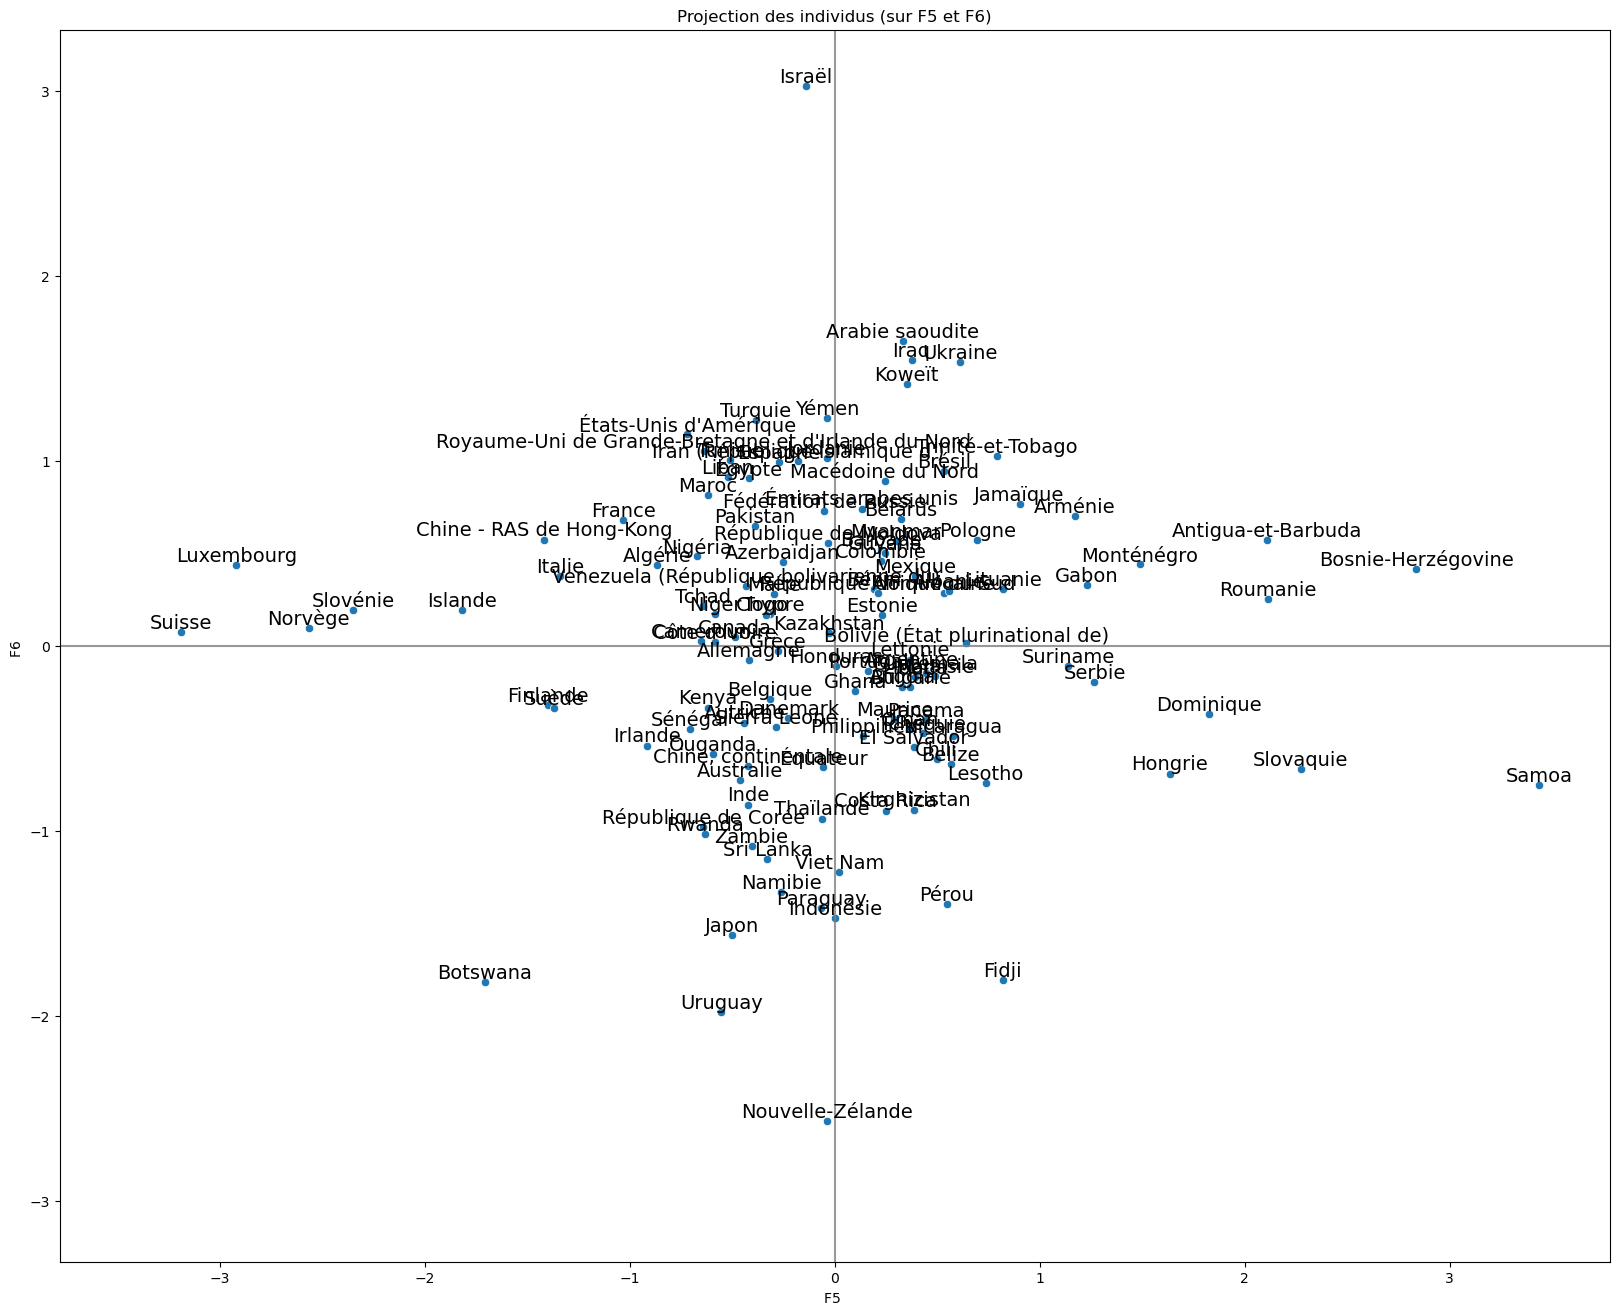

In [685]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, labels = names, figsize=(20,16), marker="o")
x_y = [2,3]
display_factorial_planes(X_proj, x_y, labels = names, figsize=(20,16), marker="o")
x_y = [4,5]
display_factorial_planes(X_proj, x_y, labels = names, figsize=(20,16), marker="o")

On enlève Hong-Kong car c'est un outlier qui pourra nous déranger par la suite

On enlève les îles avec une faibles population car elles peuvent nous déranger

In [686]:
outlier = df.loc[df.index == 'Chine - RAS de Hong-Kong']
#df = df.loc[df.index != 'Chine - RAS de Hong-Kong']
pays_a_supprimer = ['Chine - RAS de Hong-Kong', 'Antigua-et-Barbuda', 'Samoa', 'Dominique']
df = df[~df.index.isin(pays_a_supprimer)]
names = df.index
columns_names = df.columns
df.head(30)

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                                      
Afrique du Sud                                                               35.69        
Albanie                                                                      16.36        
Algérie                                                                       6.38        
Allemagne                                                                    19.47        
Angola                                                                       10.56        
Arabie saoudite                                                              43.36        
Argentine                                                                    42.24        
Arménie                                                                      16.06        
Australie                                                                    47.65        
Autriche                                                                     18.20        
Azerbaïdjan                                                                  13.11        
Barbade                                                                      46.78        
Bélarus                                                                      27.98        
Belgique                                                                     12.65        
Belize                                                                       25.69        
Bénin                                                                        14.40        
Bolivie (État plurinational de)                                              36.00        
Bosnie-Herzégovine                                                           16.70        
Botswana                                                                      3.39        
Brésil                                                                       48.03        
Bulgarie                                                                     22.06        
Cameroun                                                                      3.16        
Canada                                                                       39.02        
Chili                                                                        36.36        
Chine, continentale                                                          12.33        
Chypre                                                                       25.08        
Colombie                                                                     31.99        
Costa Rica                                                                   26.52        
Côte d'Ivoire                                                                 2.53        
Danemark                                                                     28.98        

                                 %_Exportations  %_Nourriture  %_Production  \
Zone                                                                          
Afrique du Sud                         2.888583     93.305823     76.432829   
Albanie                                0.000000     92.156863     25.490196   
Algérie                                0.000000     95.306859     99.277978   
Allemagne                             27.419355     68.293718     64.261460   
Angola                                 0.000000     98.746082     13.166144   
Arabie saoudite                        0.747384    107.249626     46.038864   
Argentine                              9.543568     85.569387     99.631166   
Arménie                                0.000000    102.173913     23.913043   
Australie                              3.268482     91.128405     98.754864   
Autriche                              30.232558     62.015504     57.364341   
Azerbaïdjan                            0.000000     98.473282     79.389313   
Barbade                                0.000000     76.470588     88.235294   
Bélarus       

On standardise à nouveau et fit l'ACP

In [687]:
X = scaler.fit_transform(df)
mypca.fit(X)
X_proj = mypca.transform(X)

Méthode du coude

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


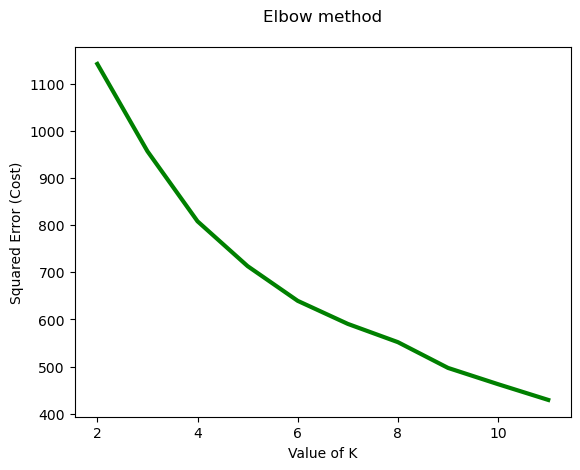

In [688]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import decomposition, preprocessing, metrics
from sklearn.metrics import silhouette_score
cost =[]
test_clusters = [i for i in range(2,12)]
for i in test_clusters:
    #cls=KMeans(n_clusters=i,n_init=50,init='k-means++')
    cls = KMeans(n_clusters=i, random_state=40)
    cls.fit(X)
    cost.append(cls.inertia_)    


plt.plot(test_clusters, cost, color ='g', linewidth ='3')
plt.title("Elbow method\n")
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

Score David Bouldin

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

1.1042601741627374


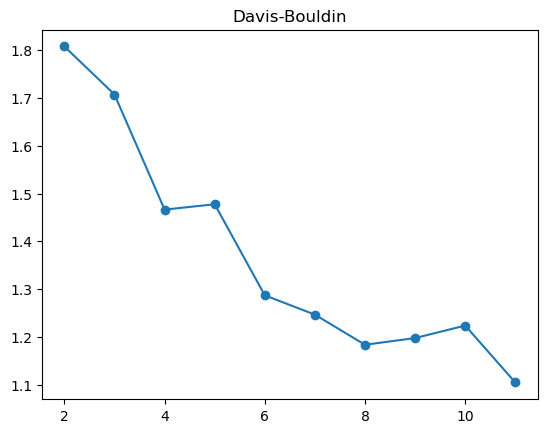

In [689]:
DB=[]
test_clusters = [i for i in range(2,12)]
for num_clusters in test_clusters:
    cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++', random_state=40) #Les deux options à la fin pour avoir une initialisation aléatoire et unique
    cls.fit(X)
    db = metrics.davies_bouldin_score(X,cls.labels_) #silhouette de X_norm étant donné le clustering de cls
    DB.append(db)

print(min(DB))
plt.plot(test_clusters,DB,marker='o')   # on choisi le score le plus haut (sauf 2 clusters)
plt.title('Davis-Bouldin')
plt.show()

Score Silhouette

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Max score : 0.27


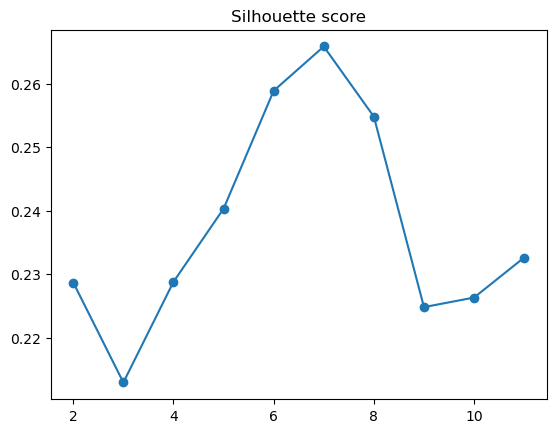

In [690]:
# score de silhouette
silhouettes=[]
test_clusters = [i for i in range(2,12)]
for num_clusters in test_clusters:
  cls = KMeans(n_clusters=num_clusters,n_init=50,init='k-means++', random_state=40) #Les deux options à la fin pour avoir une initialisation aléatoire et unique
  cls.fit(X)
  silh = metrics.silhouette_score(X,cls.labels_) #silhouette de X_norm étant donné le clustering de cls
  silhouettes.append(silh)

print("Max score : {:.2}".format(max(silhouettes)))
plt.plot(test_clusters,silhouettes,marker='o')   # on choisi le score le plus haut (sauf 2 clusters)
plt.title('Silhouette score')
plt.show()

On peut estimer que 8 clusters serait approprié

In [691]:
n_clusters = 8

1ère méthode de clustering : classification ascendante hiérarchique

In [692]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Calcul de la matrice de linkage
Z = linkage(X_proj, method='ward', metric='euclidean')  # 'ward' est une méthode courante qui minimise la variance des clusters fusionnés

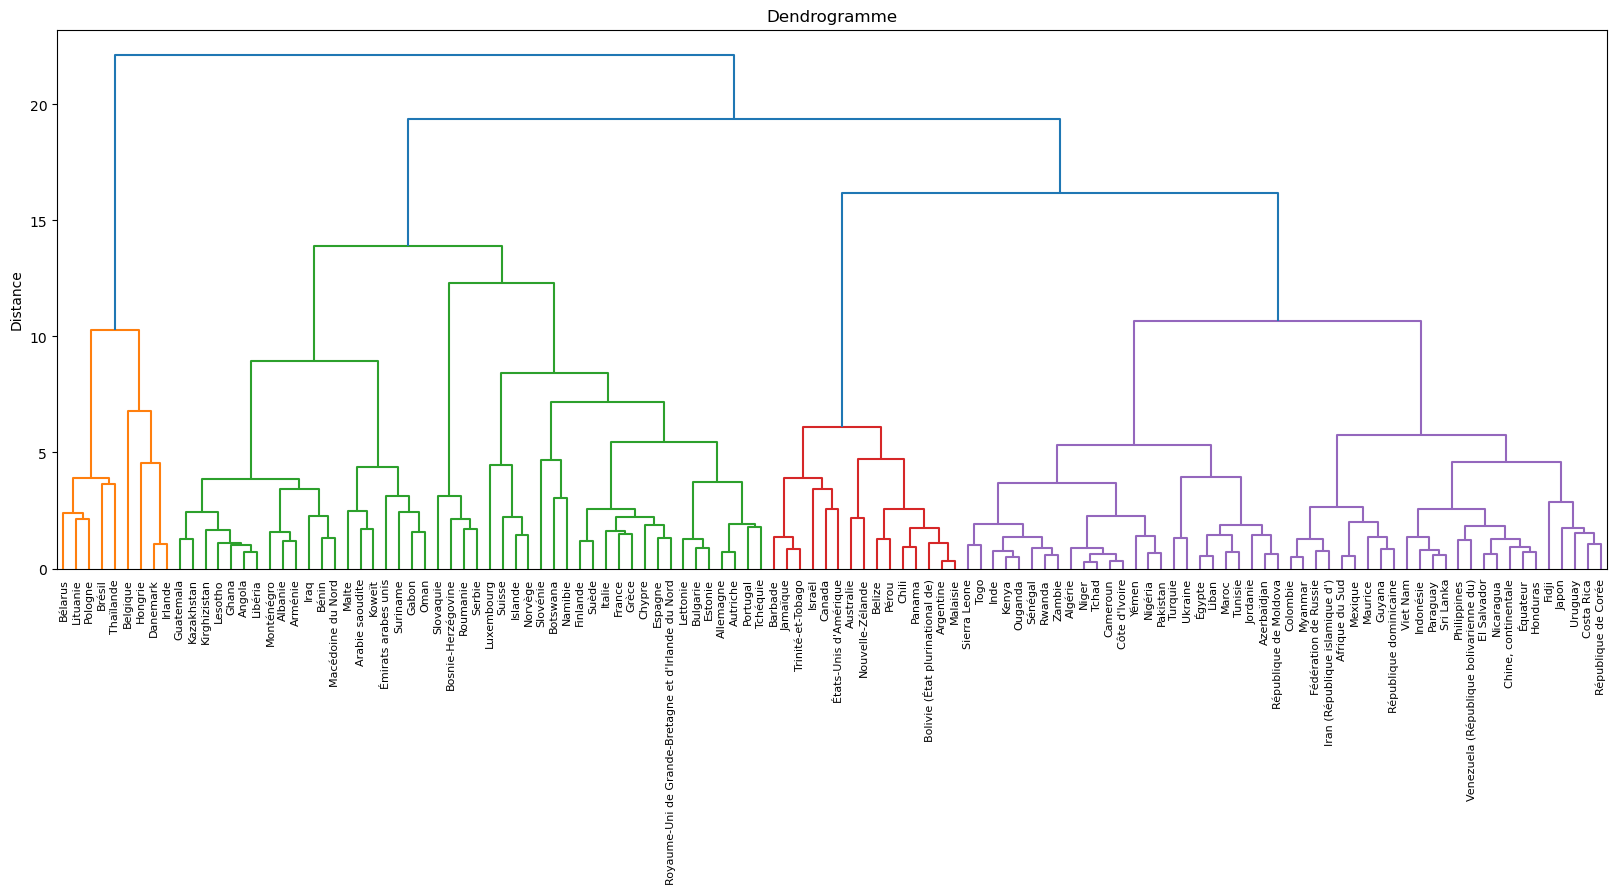

In [693]:
# Création du dendrogramme
plt.figure(figsize=(20, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogramme")
plt.ylabel("Distance")
plt.show()

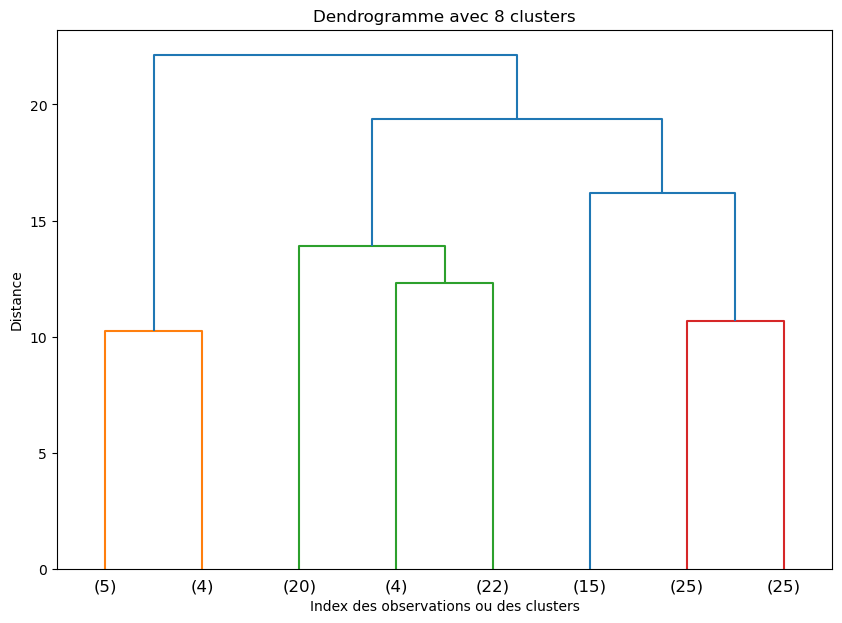

In [694]:
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=n_clusters, color_threshold='default')
plt.title(f'Dendrogramme avec {n_clusters} clusters')
plt.xlabel('Index des observations ou des clusters')
plt.ylabel('Distance')
plt.show()

In [695]:
# Former 5 clusters à partir de la matrice de liaison Z
clusters = fcluster(Z, t=n_clusters, criterion='maxclust')

In [696]:
# Ajouter les étiquettes de cluster
df['cluster_label'] = clusters

In [697]:
print(df['cluster_label'].value_counts())

8    25
7    25
5    22
3    20
6    15
1     5
2     4
4     4
Name: cluster_label, dtype: int64


On affiche nos clusters

In [698]:
for i in range(n_clusters):
    print(f'Cluster n°{i+1}')
    print(list(df.loc[df['cluster_label'] == i+1].index))

Cluster n°1
['Bélarus', 'Brésil', 'Lituanie', 'Pologne', 'Thaïlande']
Cluster n°2
['Belgique', 'Danemark', 'Hongrie', 'Irlande']
Cluster n°3
['Albanie', 'Angola', 'Arabie saoudite', 'Arménie', 'Bénin', 'Émirats arabes unis', 'Gabon', 'Ghana', 'Guatemala', 'Iraq', 'Kazakhstan', 'Kirghizistan', 'Koweït', 'Lesotho', 'Libéria', 'Macédoine du Nord', 'Malte', 'Monténégro', 'Oman', 'Suriname']
Cluster n°4
['Bosnie-Herzégovine', 'Roumanie', 'Serbie', 'Slovaquie']
Cluster n°5
['Allemagne', 'Autriche', 'Botswana', 'Bulgarie', 'Chypre', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grèce', 'Islande', 'Italie', 'Lettonie', 'Luxembourg', 'Namibie', 'Norvège', 'Portugal', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovénie', 'Suède', 'Suisse', 'Tchéquie']
Cluster n°6
['Argentine', 'Australie', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Canada', 'Chili', "États-Unis d'Amérique", 'Israël', 'Jamaïque', 'Malaisie', 'Nouvelle-Zélande', 'Panama', 'Pérou', 'Trinité-et-Tobago']
Clu

On créé les centroïdes

In [699]:
centroids = df.groupby('cluster_label').mean()
centroids_scaled = scaler.fit_transform(centroids)
centroids_cah = centroids_scaled
centroids_scaled[1]

array([ 0.04590362,  2.02153513, -1.85126966, -0.47049875,  1.79468106,
        2.1796458 ,  0.63183538, -0.04717748, -2.53338168, -1.15267312,
        1.25630073,  1.88511702])

In [700]:
centroids_pca_cah = mypca.transform(centroids_scaled)
centroids_pca_cah[1:3]

array([[ 5.13632694, -0.85519106, -0.09602555, -0.06042905,  0.86163219,
         0.08227335],
       [-1.16428848, -2.44885919,  1.53486288, -0.73147193, -1.05297428,
        -0.13861935]])

Tableau de corrélation entre les composantes et les clusters

<Axes: >

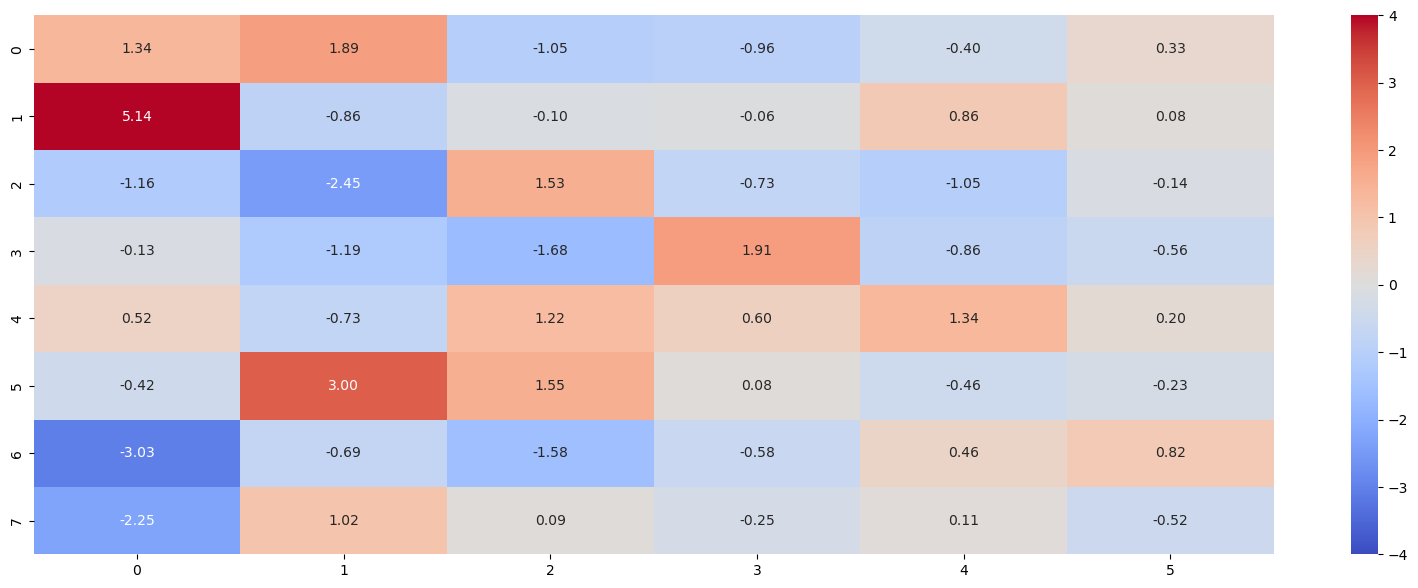

In [701]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(centroids_pca_cah, vmin=-4, vmax=4, annot=True, cmap="coolwarm", fmt="0.2f")

In [702]:
df

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                                             
Afrique du Sud                                                                      35.69        
Albanie                                                                             16.36        
Algérie                                                                              6.38        
Allemagne                                                                           19.47        
Angola                                                                              10.56        
...                                                                                   ...        
Uruguay                                                                              9.12        
Venezuela (République bolivarienne du)                                              20.28        
Viet Nam                                                                            12.33        
Yémen                                                                                8.53        
Zambie                                                                               3.42        

                                        %_Exportations  %_Nourriture  \
Zone                                                                   
Afrique du Sud                                2.888583     93.305823   
Albanie                                       0.000000     92.156863   
Algérie                                       0.000000     95.306859   
Allemagne                                    27.419355     68.293718   
Angola                                        0.000000     98.746082   
...                                                ...           ...   
Uruguay                                       8.333333     86.111111   
Venezuela (République bolivarienne du)        0.000000     95.360000   
Viet Nam                                      0.082713     96.443342   
Yémen                                         0.000000     96.341463   
Zambie                                        1.639344     95.081967   

                                        %_Production  Rapport Importation/Pop  \
Zone                                                                            
Afrique du Sud                             76.432829                 9.016001   
Albanie                                    25.490196                13.175372   
Algérie                                    99.277978                 0.048322   
Allemagne                                  64.261460                10.186501   
Angola                                     13.166144                 9.290075   
...                                              ...                      ...   
Uruguay                                    91.666667                 0.872945   
Venezuela (République bolivarienne du)     96.000000                 0.850268   
Viet Nam                                   75.930521                 3.076089   
Yémen                                      68.292683                 2.802246   
Zambie                                     80.327869                 0.712014   

                                        Rapport Exportation/Pop  \
Zone                                                              
Afrique du Sud                                         1.105074   
Albanie                                                0.000000   
Algérie                                                0.000000   
Allemagne                                              7.815297   
Angola                                                 0.000000   
...                                                         ...   
Uruguay                                                0.872945   
Venezuela (République bolivarienne du)                 0.000000   
Viet Nam                                               0.010571   
Yémen                                

Projection sur les plans factoriels des centroïdes et des clusters

In [703]:
def proj_centroid_cah(x_y, cluster_colors, centroid_colors):
    x, y = x_y
    plt.figure(figsize=(10, 8))
    
    scatter = plt.scatter(X_proj[:, x], X_proj[:, y], color=cluster_colors, alpha=0.4)  # Observations

    # Afficher les centroïdes
    
    plt.scatter(centroids_pca_cah[:, x], centroids_pca_cah[:, y], c=centroid_colors,alpha=1, marker='X', s=80, label='Centroids')
    #sns.color_palette("flare", as_cmap=True)
    
    plt.xlabel(f'F{x+1}')
    plt.ylabel(f'F{y+1}')
    plt.title(f'Plan factoriel F{x+1} et F{y+1} avec centroïdes des clusters')
    plt.legend()
    plt.show()

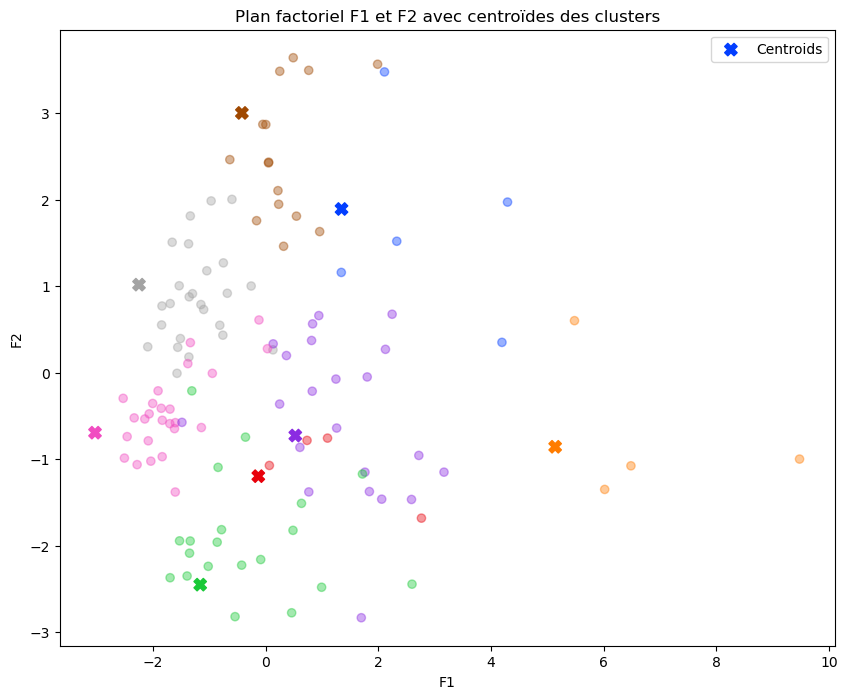

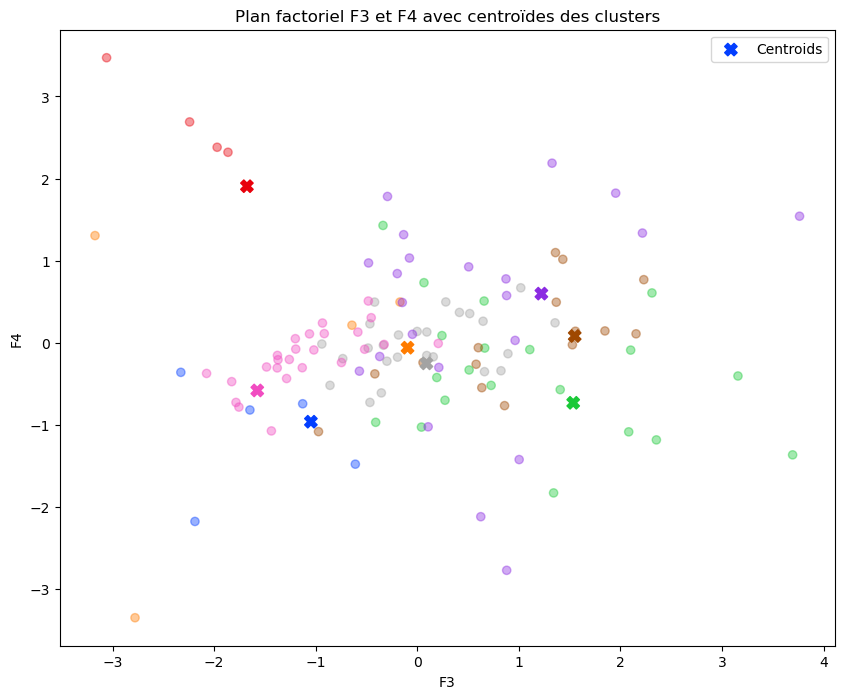

In [705]:
palette = sns.color_palette("bright", len(df['cluster_label'].unique()))
cluster_colors = [palette[label-1] for label in df['cluster_label']]
centroid_colors = [palette[i] for i in range(len(centroids_pca_cah))]
proj_centroid_cah((0, 1), cluster_colors, centroid_colors)
proj_centroid_cah((2, 3), cluster_colors, centroid_colors)

In [706]:
centroids_cah_df = pd.DataFrame(centroids_cah, columns=columns_names)
centroids_cah_df.reset_index(inplace=True)
centroids_cah_df.rename(columns={'index': 'Cluster'}, inplace=True)
centroids_cah_df.head()

Cluster  Disponibilité alimentaire en quantité (kg/personne/an)  \
0        0                                           0.737422        
1        1                                           0.045904        
2        2                                          -0.203416        
3        3                                          -0.846989        
4        4                                          -0.219556        

   %_Exportations  %_Nourriture  %_Production  Rapport Importation/Pop  \
0        1.246679     -1.190672      0.853587                -0.618422   
1        2.021535     -1.851270     -0.470499                 1.794681   
2       -0.751031      0.927127     -2.267640                 1.440764   
3       -0.111003     -0.022312      0.017982                -0.318207   
4       -0.112139     -0.021096     -0.409600                 0.204768   

   Rapport Exportation/Pop  Rapport Production/Pop  Evo%_Import/Pop  \
0                 1.136813                1.419653        -0.006269   
1                 2.179646                0.631835        -0.047177   
2                -0.628267               -1.216405         0.381729   
3                -0.433200               -0.650808        -2.566053   
4                -0.320001               -0.395906         0.661979   

   Evo%_Export/Pop  distance  Political_Stability   PIB/Hab  
0         0.434841  0.022521            -0.146273 -0.565415  
1        -2.533382 -1.152673             1.256301  1.885117  
2         0.556757  0.030045            -0.418867 -0.591477  
3        -0.311685 -1.016129             0.151187 -0.602404  
4         0.164009 -0.847845             1.210673  1.289292

On créé un graphique araignée pour visualiser les données des clusters

C:\Users\kilia\AppData\Local\Temp\ipykernel_22380\3707924809.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df_spider.index))


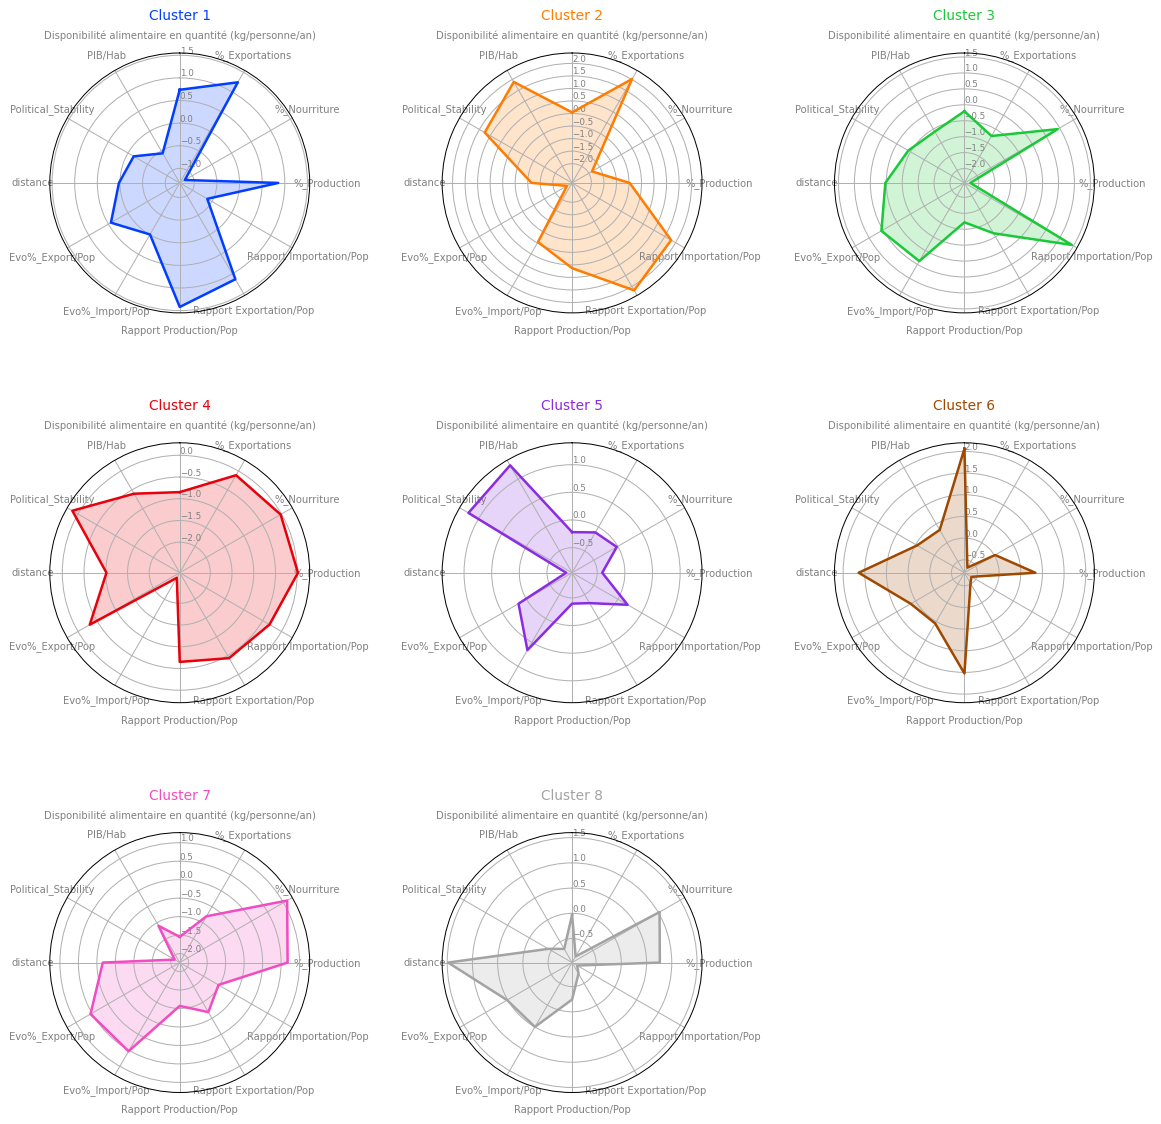

In [713]:
from math import pi
df_spider = centroids_cah_df
def make_spider( row, title, color):
    
    # number of variable
    categories=list(df_spider)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2], color="grey", size=7)

    # Ind1
    values=df_spider.loc[row].drop('Cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.2)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    
# initialize the figure
my_dpi=90
plt.figure(figsize=(15, 15), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_spider.index))
 
# Loop to plot
for row in range(0, len(df_spider.index)):
    make_spider( row=row, title=f'Cluster {row+1}', color=centroid_colors[row])

In [714]:
len(df.columns)

13

Boxplot pour visualiser les données des clusters

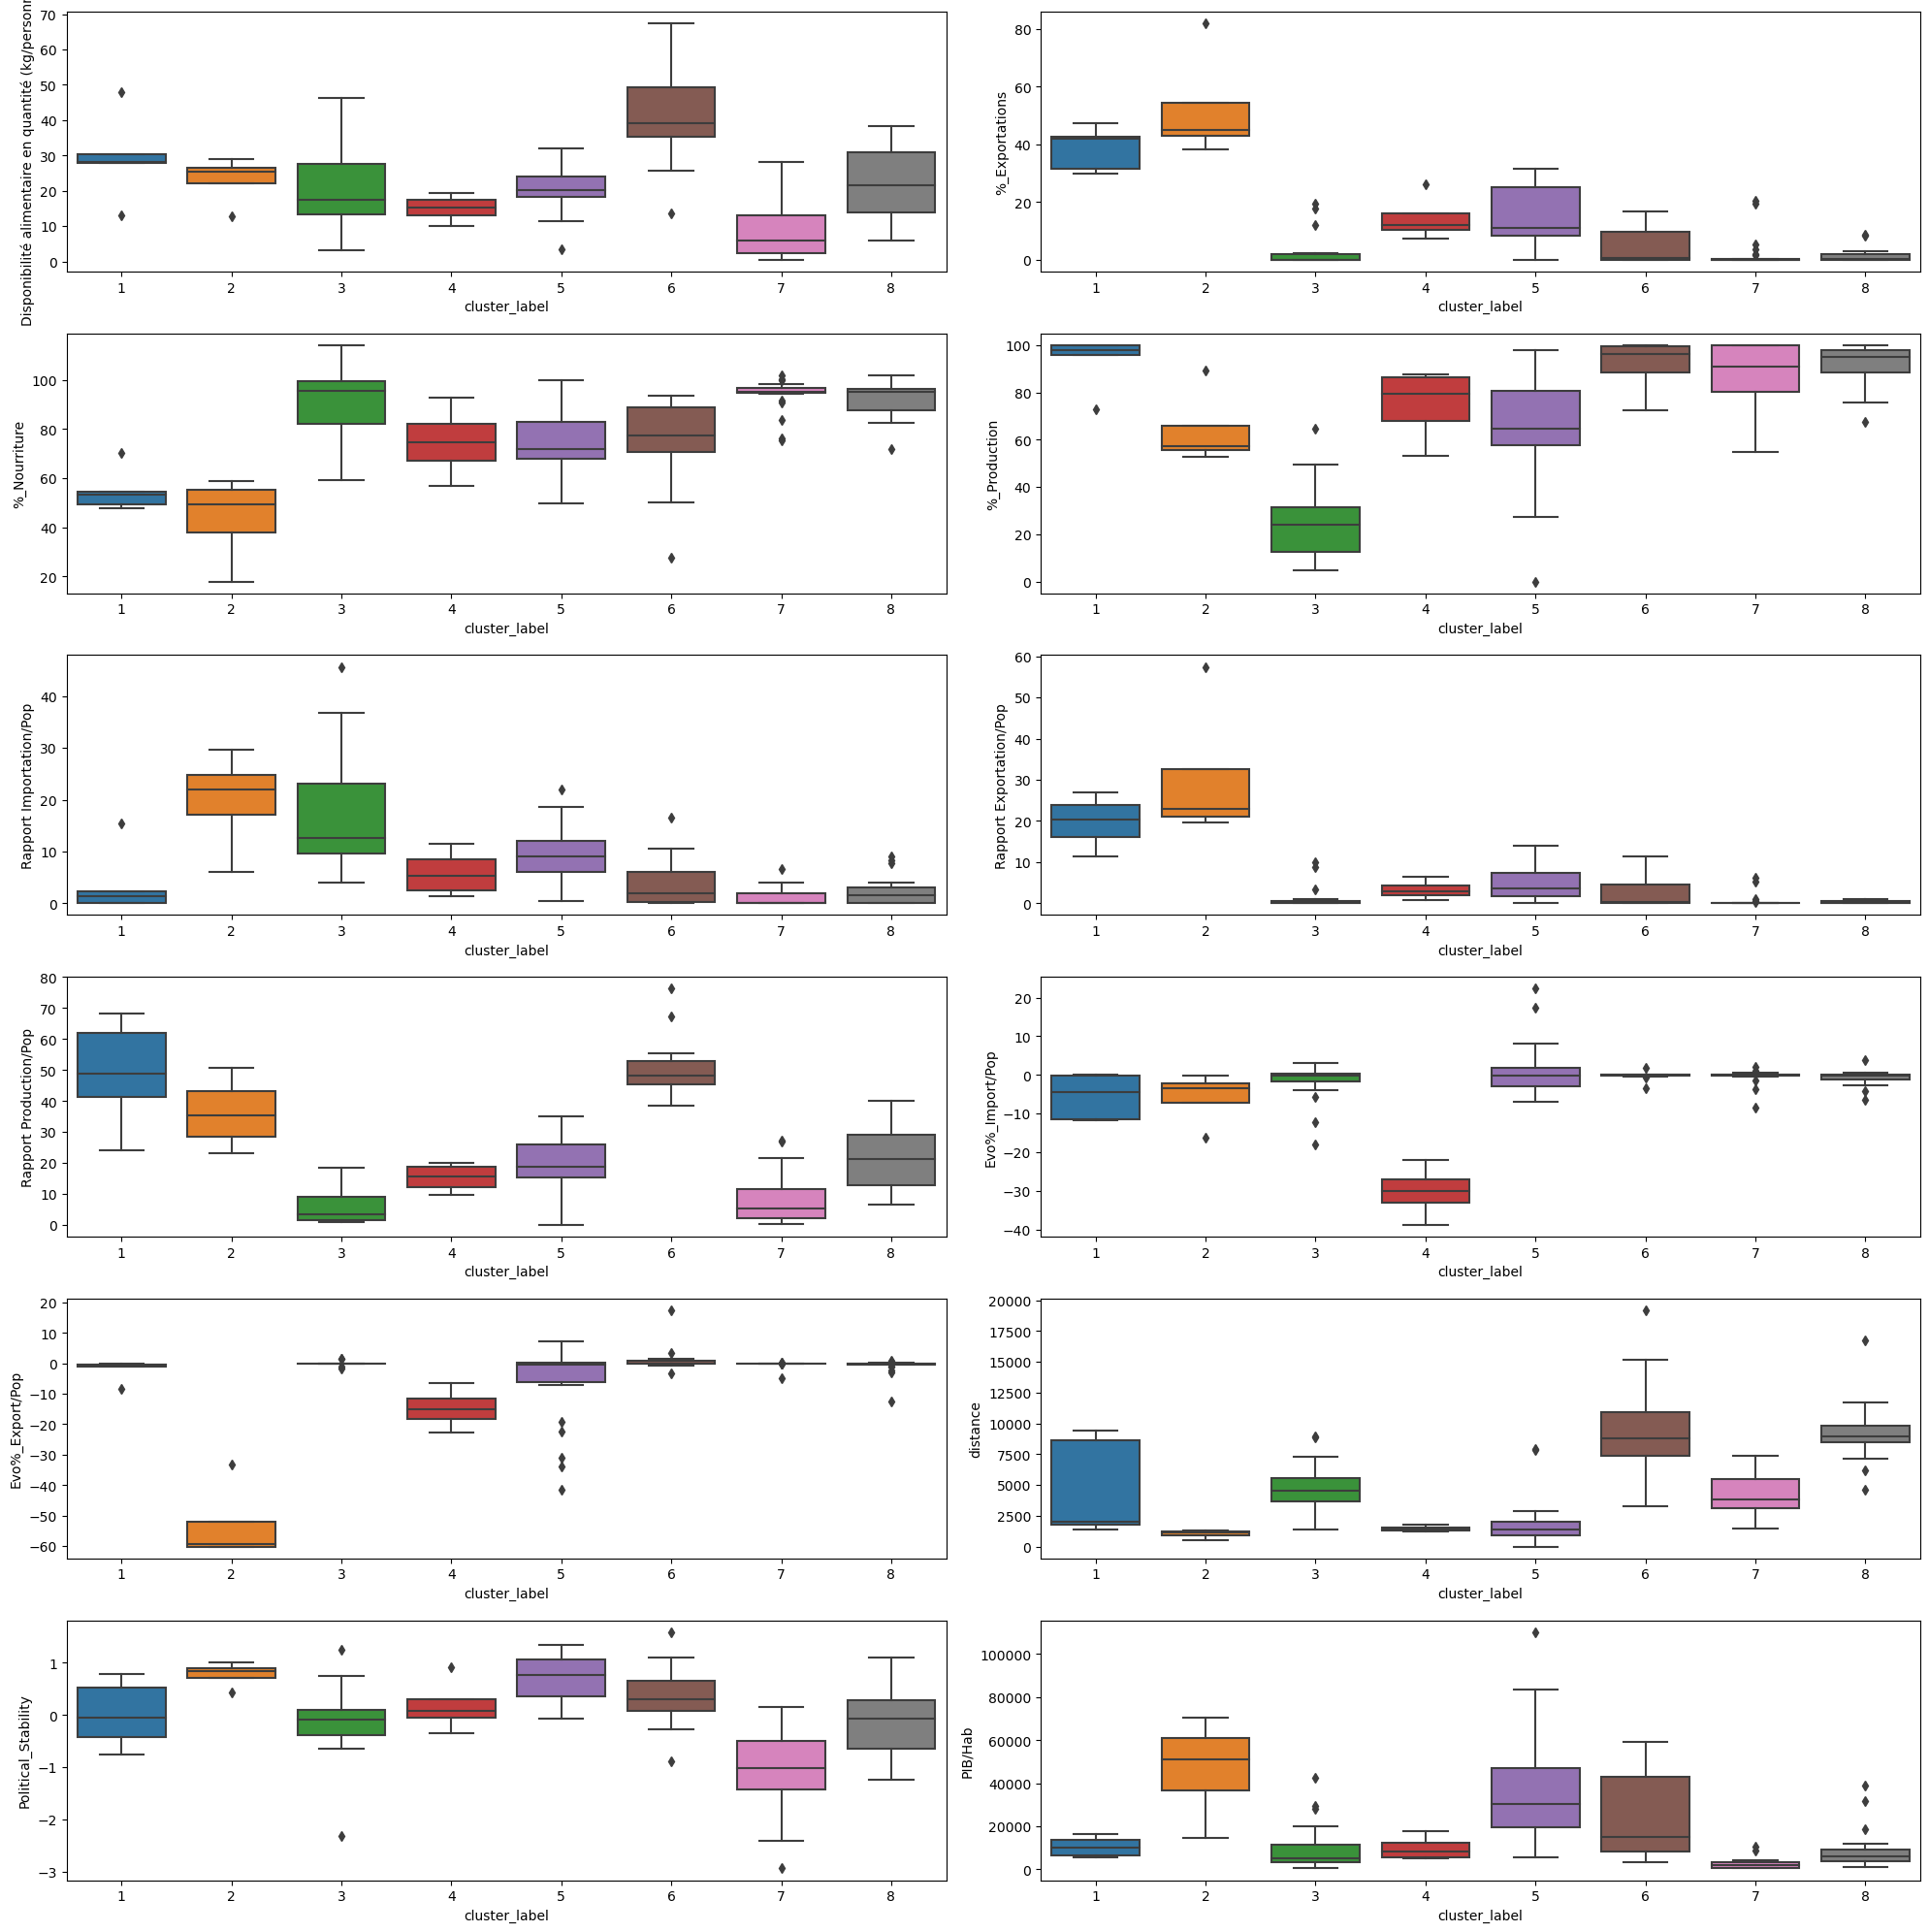

In [715]:
fig, ax = plt.subplots(6, 2, figsize=(20,20))
 
for index, column in enumerate(df.columns):
    i, j = divmod(index, 2)  # Calcul pour déterminer la position de l'axe (i, j)
    if i == 6:
        pass
    else:
        sns.boxplot(ax=ax[i, j], data=df, x='cluster_label', y=df[column])
        
plt.tight_layout()
plt.show()

Les clusters 2, 3, 4 et 5 peuvent nous intéresser

2ème méthode de clustering : CLUSTERING K-MEANS

In [716]:
# Clustering K-means
kmeans = KMeans(n_clusters=n_clusters, n_init=50, init='k-means++', random_state=40)
kmeans.fit(X_proj)

# Récupération des clusters
clusters_kmeans = kmeans.labels_

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [717]:
# Ajouter les étiquettes de cluster
df_kmeans = df.copy()
df_kmeans['cluster_label'] = clusters_kmeans
df_kmeans.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        
Angola                                                      10.56        

                %_Exportations  %_Nourriture  %_Production  \
Zone                                                         
Afrique du Sud        2.888583     93.305823     76.432829   
Albanie               0.000000     92.156863     25.490196   
Algérie               0.000000     95.306859     99.277978   
Allemagne            27.419355     68.293718     64.261460   
Angola                0.000000     98.746082     13.166144   

                Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                               
Afrique du Sud                 9.016001                 1.105074   
Albanie                       13.175372                 0.000000   
Algérie                        0.048322                 0.000000   
Allemagne                     10.186501                 7.815297   
Angola                         9.290075                 0.000000   

                Rapport Production/Pop  Evo%_Import/Pop  Evo%_Export/Pop  \
Zone                                                                       
Afrique du Sud               29.240609         0.164938        -0.359247   
Albanie                       4.507364        -5.830877         0.002521   
Algérie                       6.644247         1.041509         0.000000   
Allemagne                    18.316346        -6.853765       -22.374989   
Angola                        1.408603        -0.267012         0.000000   

                distance  Political_Stability       PIB/Hab  cluster_label  
Zone                                                                        
Afrique du Sud   8789.06                -0.28   6723.928582              0  
Albanie          1545.60                 0.38   4521.752217              2  
Algérie          2023.54                -0.92   4134.936055              4  
Allemagne         815.79                 0.59  44670.222282              1  
Angola           6574.32                -0.33   4042.681403              2

In [718]:
print((df_kmeans['cluster_label']).value_counts())

0    25
4    25
1    21
3    17
2    14
7     8
5     6
6     4
Name: cluster_label, dtype: int64


On affiche nos clusters

In [719]:
for i in range(n_clusters):
    print(f'Cluster n°{i+1}')
    print(list(df_kmeans.loc[df_kmeans['cluster_label'] == i].index))

Cluster n°1
['Afrique du Sud', 'Botswana', 'Chine, continentale', 'Colombie', 'Costa Rica', 'El Salvador', 'Équateur', 'Fédération de Russie', 'Fidji', 'Guatemala', 'Honduras', 'Indonésie', 'Japon', 'Mexique', 'Myanmar', 'Nicaragua', 'Paraguay', 'Pérou', 'Philippines', 'République de Corée', 'République dominicaine', 'Sri Lanka', 'Uruguay', 'Viet Nam', 'Zambie']
Cluster n°2
['Allemagne', 'Autriche', 'Bélarus', 'Bulgarie', 'Chypre', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grèce', 'Islande', 'Italie', 'Lettonie', 'Norvège', 'Portugal', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Slovénie', 'Suède', 'Suisse', 'Tchéquie', 'Thaïlande']
Cluster n°3
['Albanie', 'Angola', 'Arménie', 'Bénin', 'Ghana', 'Iraq', 'Kazakhstan', 'Kirghizistan', 'Lesotho', 'Libéria', 'Macédoine du Nord', 'Monténégro', 'Namibie', 'Sierra Leone']
Cluster n°4
['Argentine', 'Australie', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Canada', 'Chili', "États-Unis d'Amérique", 'Guyana', 

In [720]:
centroids_kmeans = kmeans.cluster_centers_
centroids_kmeans_scaled = scaler.fit_transform(centroids_kmeans)
centroids_kmeans_scaled[1]

array([0.31619096, 0.07838854, 0.20280559, 0.11530734, 1.45191147,
       0.9082163 ])

In [721]:
#centroids_pca_kmeans = mypca.transform(centroids_kmeans_scaled)
centroids_pca_kmeans = centroids_kmeans_scaled
centroids_pca_kmeans[1:3]

array([[ 0.31619096,  0.07838854,  0.20280559,  0.11530734,  1.45191147,
         0.9082163 ],
       [-0.74242824, -1.2130645 ,  0.33663754, -0.47103458, -0.33676828,
        -0.47520686]])

Tableau de corrélation entre clusters et composantes

<Axes: >

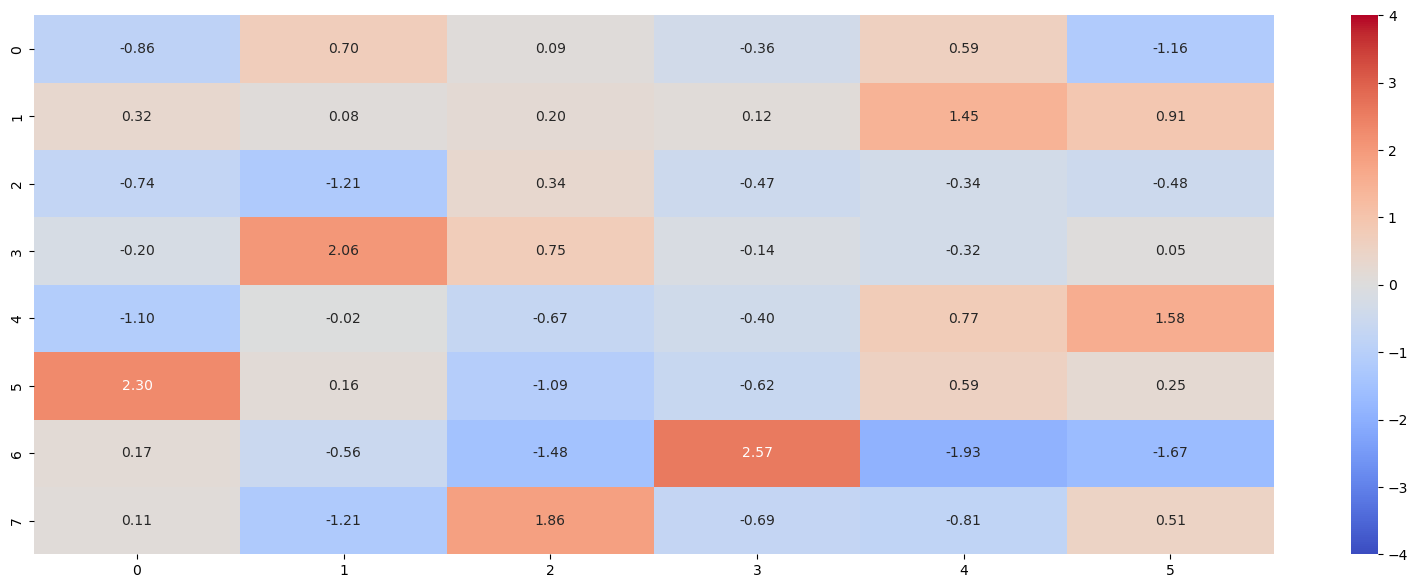

In [722]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(centroids_pca_kmeans, vmin=-4, vmax=4, annot=True, cmap="coolwarm", fmt="0.2f")

Projection sur les plans factoriels des centroïdes et des clusters

In [723]:
def proj_centroid_kmeans(x_y, cluster_colors, centroid_colors):
    x, y = x_y
    plt.figure(figsize=(10, 8))
    
    plt.scatter(X_proj[:, x], X_proj[:, y], alpha=0.4, color=cluster_colors)

    # Afficher les centroïdes
    
    plt.scatter(centroids_pca_kmeans[:, x], centroids_pca_kmeans[:, y], c=centroid_colors,alpha=1, marker='X', s=80, label='Centroids')
    #sns.color_palette("flare", as_cmap=True)
    plt.xlabel(f'F{x+1}')
    plt.ylabel(f'F{y+1}')
    plt.title(f'Plan factoriel F{x+1} et F{y+1} avec centroïdes des clusters')
    plt.legend()
    plt.show()

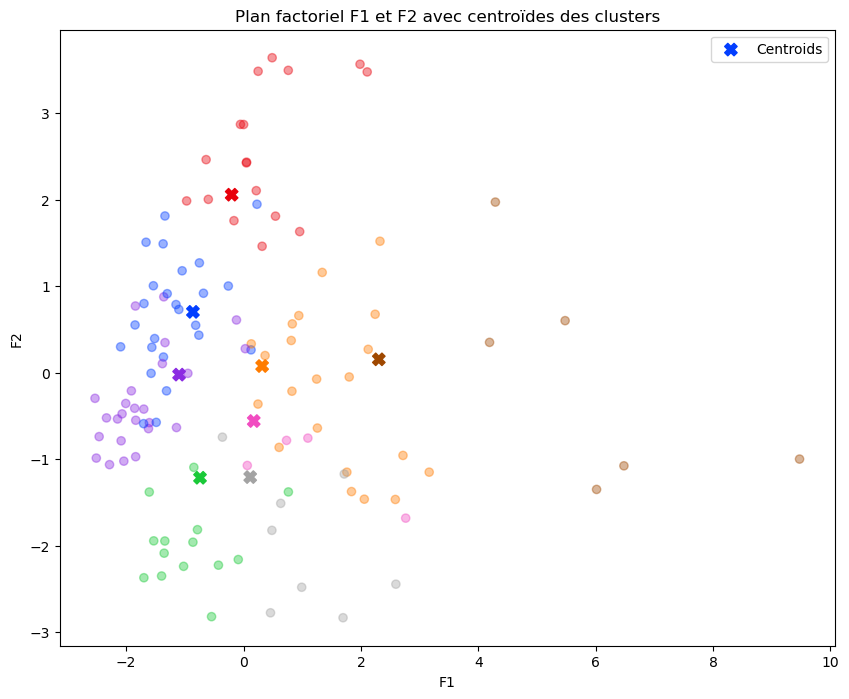

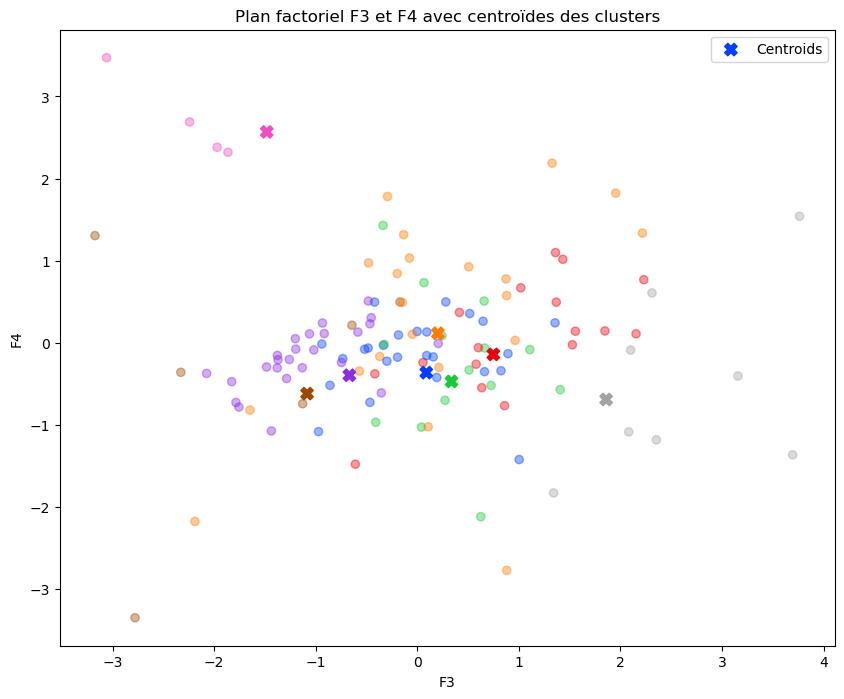

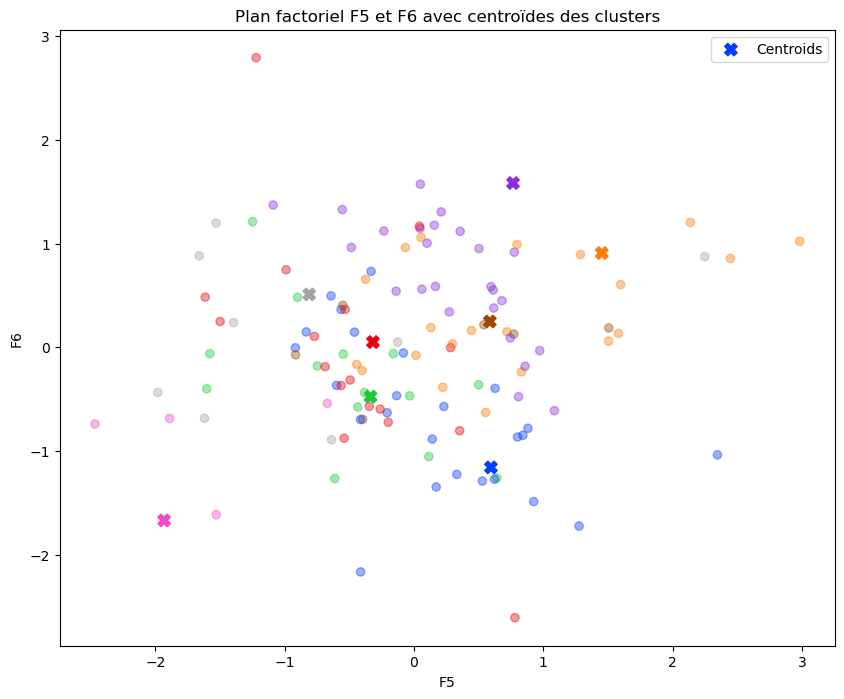

In [724]:
palette = sns.color_palette("bright", len(df_kmeans['cluster_label'].unique()))
cluster_colors = [palette[label] for label in df_kmeans['cluster_label']]
centroid_colors = [palette[i] for i in range(len(centroids_pca_kmeans))]
proj_centroid_kmeans((0, 1), cluster_colors, centroid_colors)
proj_centroid_kmeans((2, 3), cluster_colors, centroid_colors)
proj_centroid_kmeans((4, 5), cluster_colors, centroid_colors)

In [725]:
len(df_kmeans.columns)

13

Boxplot pour visualiser les données des clusters

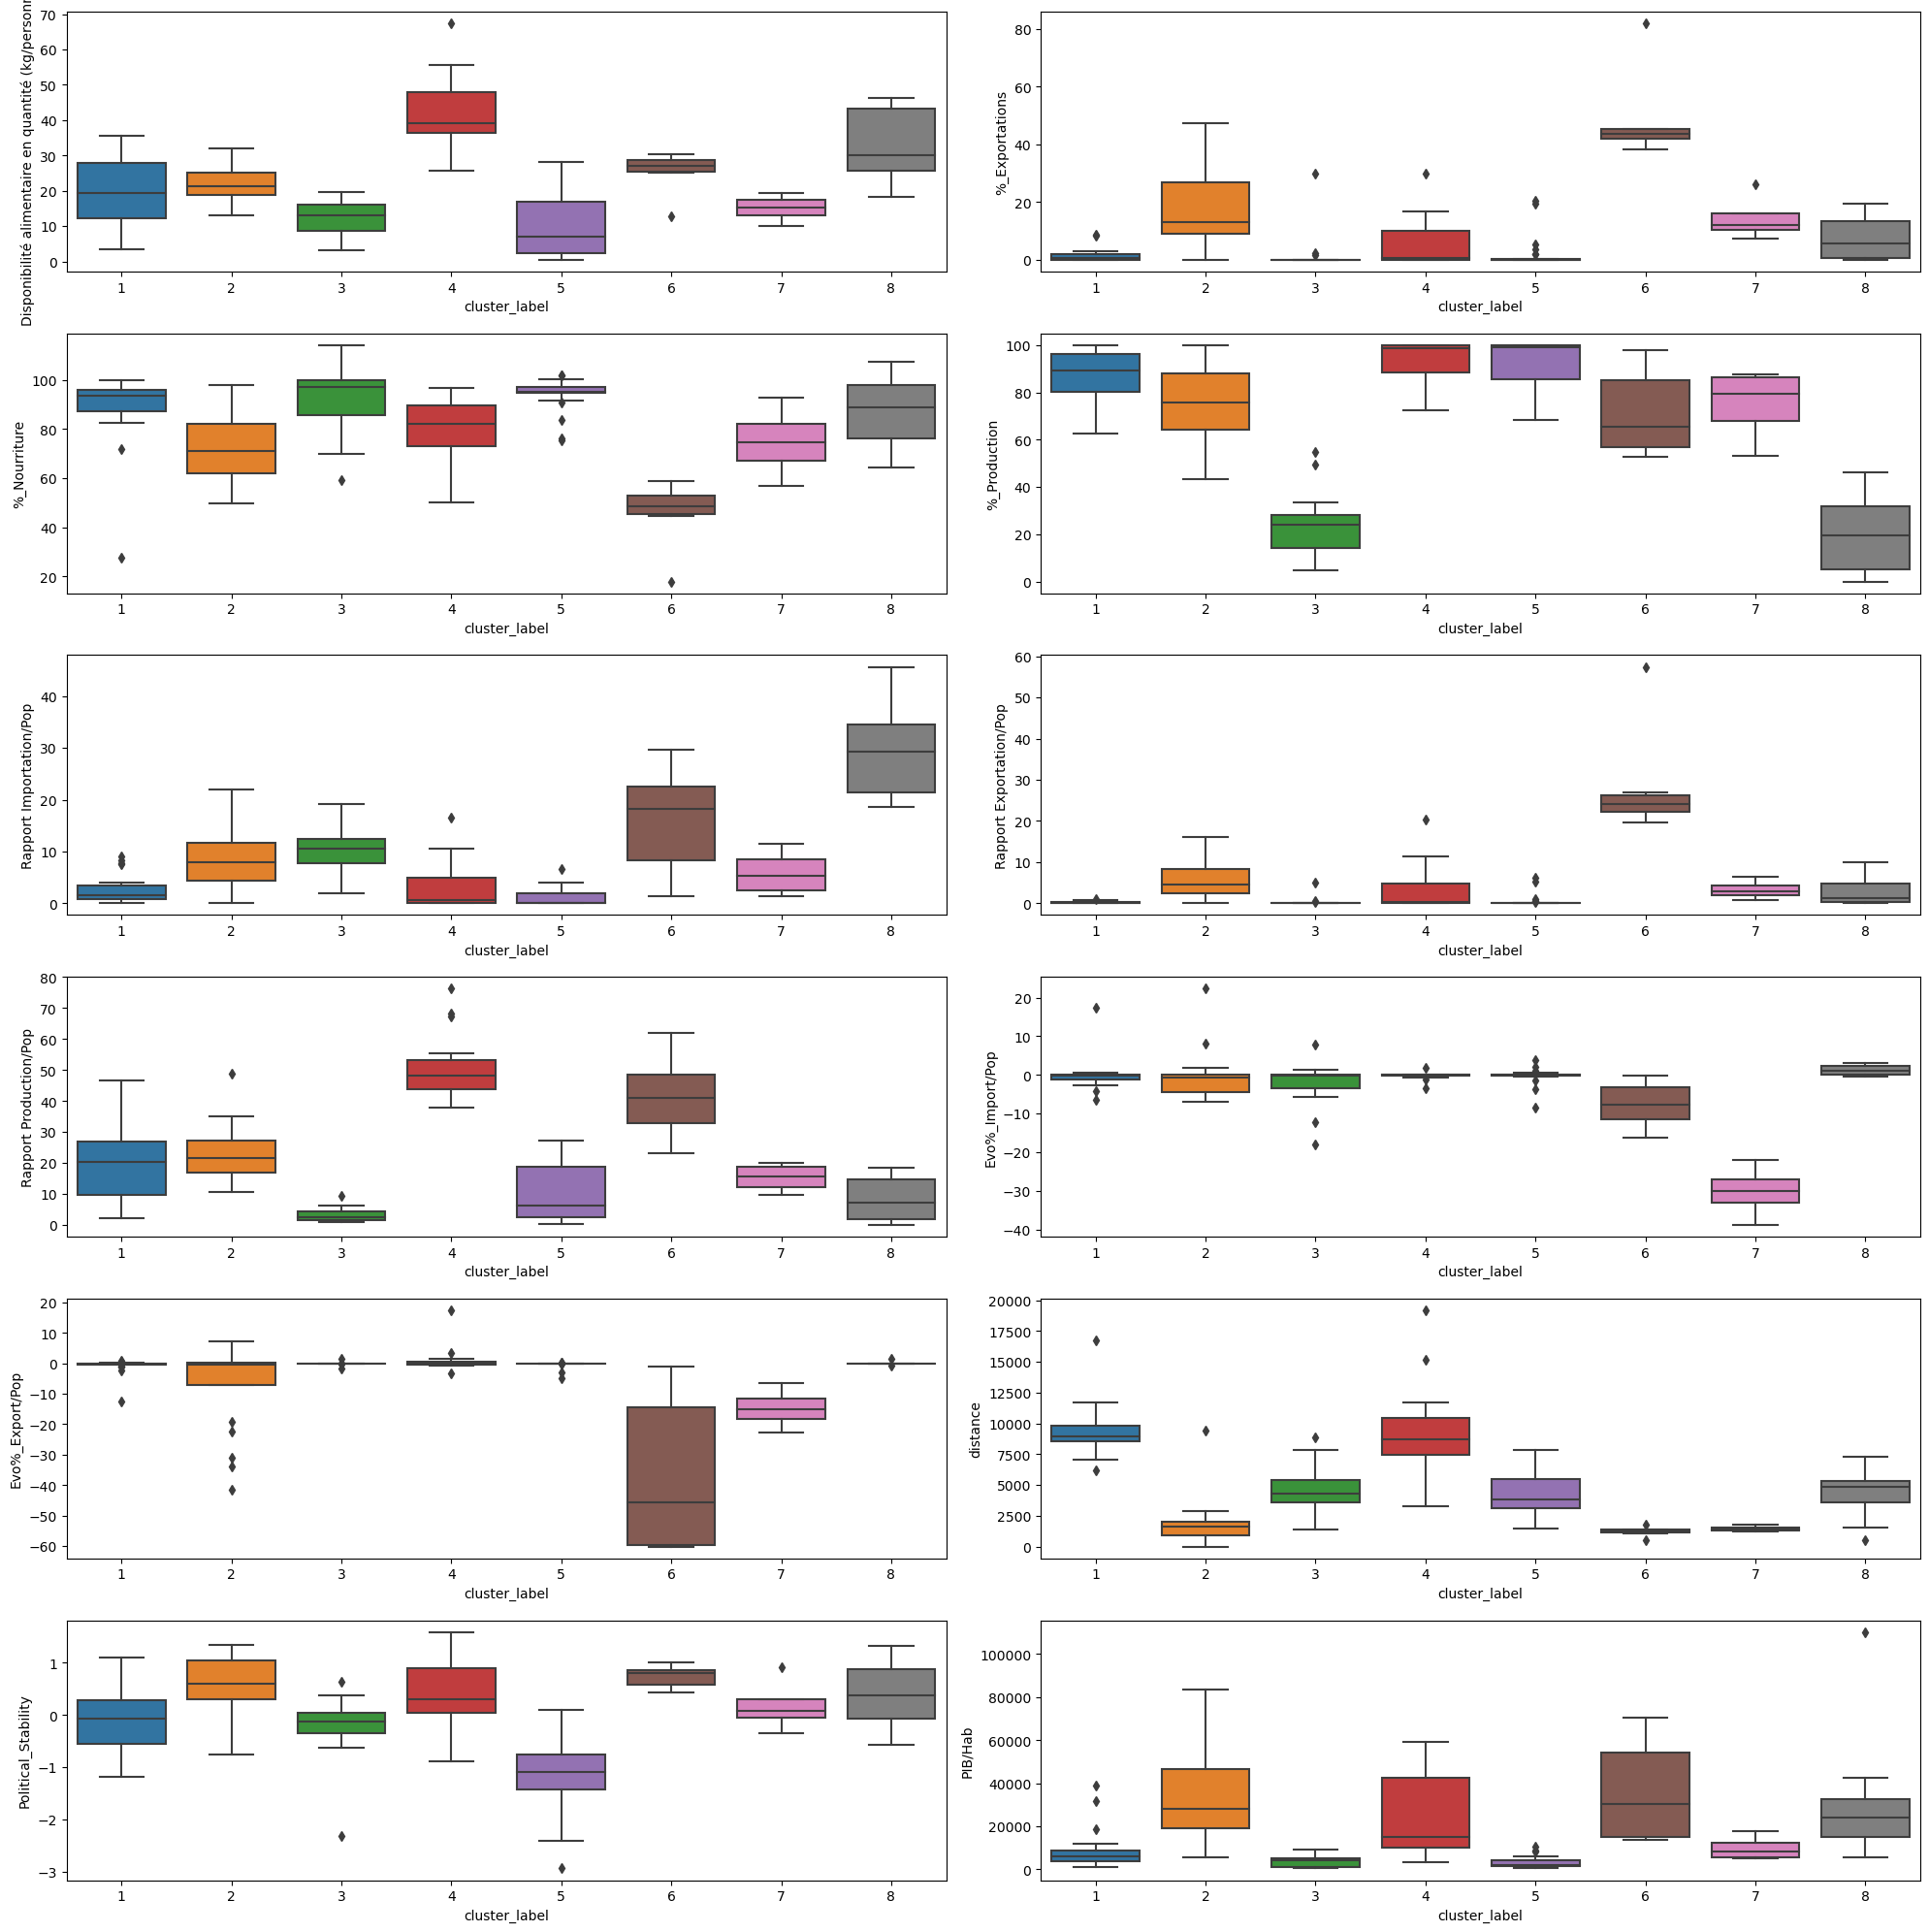

In [726]:
fig, ax = plt.subplots(6, 2, figsize=(20,20))
 
for index, column in enumerate(df_kmeans.columns):
    i, j = divmod(index, 2)  # Calcul pour déterminer la position de l'axe (i, j)
    if i == 6:
        pass
    else:
        sns.boxplot(ax=ax[i, j], data=df_kmeans, x=df_kmeans['cluster_label']+1, y=df_kmeans[column])
        
plt.tight_layout()
plt.show()

In [727]:
centroids_kmeans_mean = df_kmeans.groupby('cluster_label').mean()
centroids_kmeans_mean_scaled = scaler.fit_transform(centroids_kmeans_mean)

In [728]:
centroids_kmeans_df = pd.DataFrame(centroids_kmeans_mean_scaled, columns=columns_names)
centroids_kmeans_df.reset_index(inplace=True)
centroids_kmeans_df.rename(columns={'index': 'Cluster'}, inplace=True)
centroids_kmeans_df.head()

Cluster  Disponibilité alimentaire en quantité (kg/personne/an)  \
0        0                                          -0.318788        
1        1                                          -0.034486        
2        2                                          -0.990495        
3        3                                           1.999704        
4        4                                          -1.176619        

   %_Exportations  %_Nourriture  %_Production  Rapport Importation/Pop  \
0       -0.740840      0.657793      0.758311                -0.798200   
1        0.299337     -0.542417      0.235623                -0.142886   
2       -0.676275      0.852113     -1.568079                 0.046528   
3       -0.456876      0.073473      0.978724                -0.707474   
4       -0.696401      0.996331      0.907612                -0.978887   

   Rapport Exportation/Pop  Rapport Production/Pop  Evo%_Import/Pop  \
0                -0.607046               -0.129032         0.498432   
1                -0.002191                0.127447         0.448539   
2                -0.588850               -1.178141         0.270133   
3                -0.268649                1.878598         0.489415   
4                -0.572644               -0.735726         0.488825   

   Evo%_Export/Pop  distance  Political_Stability   PIB/Hab  
0         0.541577  1.572566            -0.329727 -0.777326  
1         0.024140 -0.879477             0.902940  1.178549  
2         0.595894 -0.007149            -0.626493 -1.139567  
3         0.686416  1.600235             0.440297  0.256649  
4         0.573293 -0.128644            -2.209110 -1.186264

Graphique araignée pour visualiser les centoïdes de chaque cluster

C:\Users\kilia\AppData\Local\Temp\ipykernel_22380\1656341363.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(df_spider.index))


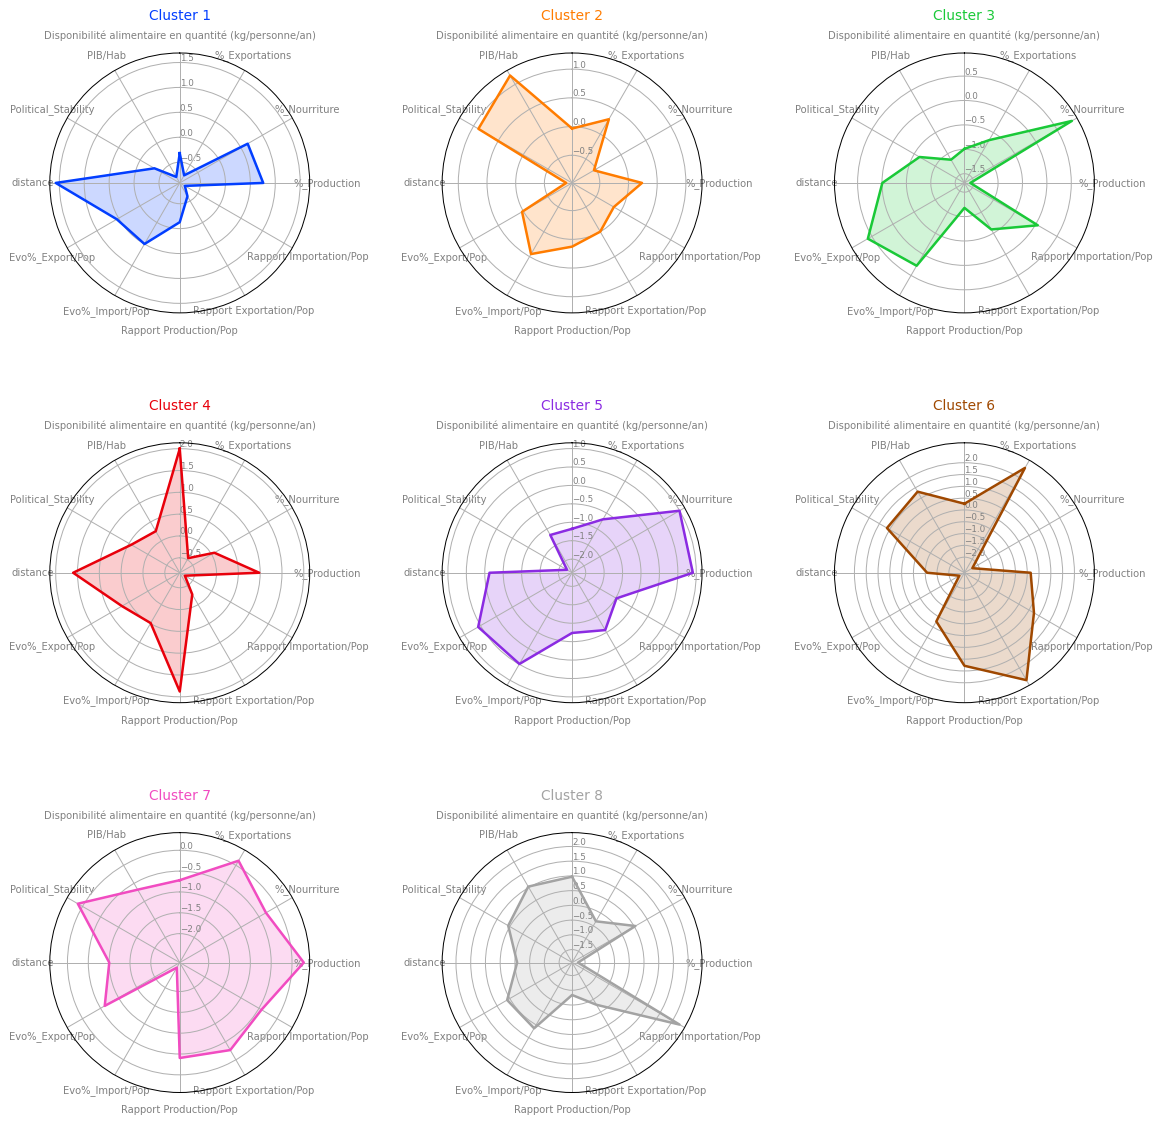

In [729]:
df_spider = centroids_kmeans_df    

# initialize the figure
my_dpi=90
plt.figure(figsize=(15, 15), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_spider.index))
 
# Loop to plot
for row in range(0, len(df_spider.index)):
    make_spider( row=row, title=f'Cluster {row+1}', color=centroid_colors[row])

Cluster 2, 6, 7 et 8 nous interrese particulièrement car faible production de poulet donc forte importation

DF_FINAL

In [730]:
df_kmeans_r = df_kmeans.rename(columns = { 'cluster_label' : 'kmeans_cluster'})
df_r = df.rename(columns = { 'cluster_label' : 'cah_cluster'})
dff = df_kmeans_r.merge(df_r['cah_cluster'], on='Zone', how='inner')
dff['kmeans_cluster'] = dff['kmeans_cluster']+1
print(len(df_kmeans))
print(len(df))
print(len(dff))
dff.head()

120
120
120


Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        
Angola                                                      10.56        

                %_Exportations  %_Nourriture  %_Production  \
Zone                                                         
Afrique du Sud        2.888583     93.305823     76.432829   
Albanie               0.000000     92.156863     25.490196   
Algérie               0.000000     95.306859     99.277978   
Allemagne            27.419355     68.293718     64.261460   
Angola                0.000000     98.746082     13.166144   

                Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                               
Afrique du Sud                 9.016001                 1.105074   
Albanie                       13.175372                 0.000000   
Algérie                        0.048322                 0.000000   
Allemagne                     10.186501                 7.815297   
Angola                         9.290075                 0.000000   

                Rapport Production/Pop  Evo%_Import/Pop  Evo%_Export/Pop  \
Zone                                                                       
Afrique du Sud               29.240609         0.164938        -0.359247   
Albanie                       4.507364        -5.830877         0.002521   
Algérie                       6.644247         1.041509         0.000000   
Allemagne                    18.316346        -6.853765       -22.374989   
Angola                        1.408603        -0.267012         0.000000   

                distance  Political_Stability       PIB/Hab  kmeans_cluster  \
Zone                                                                          
Afrique du Sud   8789.06                -0.28   6723.928582               1   
Albanie          1545.60                 0.38   4521.752217               3   
Algérie          2023.54                -0.92   4134.936055               5   
Allemagne         815.79                 0.59  44670.222282               2   
Angola           6574.32                -0.33   4042.681403               3   

                cah_cluster  
Zone                         
Afrique du Sud            8  
Albanie                   3  
Algérie                   7  
Allemagne                 5  
Angola                    3

Choix des pays avec clustering K-Means

In [731]:
dff.loc[dff['kmeans_cluster'] == 2].sort_values(by='%_Production',ascending=True).head(20)

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                                                         
Lettonie                                                                                        20.89        
Estonie                                                                                         21.26        
Bulgarie                                                                                        22.06        
Autriche                                                                                        18.20        
Tchéquie                                                                                        21.96        
Suisse                                                                                          15.72        
Chypre                                                                                          25.08        
Allemagne                                                                                       19.47        
Suède                                                                                           16.60        
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                                              31.94        
Grèce                                                                                           15.32        
France                                                                                          22.90        
Slovénie                                                                                        24.41        
Portugal                                                                                        30.58        
Islande                                                                                         29.95        
Espagne                                                                                         30.39        
Finlande                                                                                        18.76        
Italie                                                                                          18.88        
Bélarus                                                                                         27.98        
Norvège                                                                                         19.05        

                                                    %_Exportations  \
Zone                                                                 
Lettonie                                                 26.315789   
Estonie                                                  26.829268   
Bulgarie                                                 20.930233   
Autriche                                                 30.232558   
Tchéquie                                                  9.677419   
Suisse                                                    2.816901   
Chypre                                                    2.564103   
Allemagne                                                27.419355   
Suède                                                     9.543568   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...       13.844967   
Grèce                                                     8.923077   
France                                                   22.207447   
Slovénie                                                 31.521739   
Portugal                                                  9.932280   
Islande                                                   0.000000   
Espagne                                                  12.325581   
Finlande                                                  8.275862   
Italie                                                   12.960340   
Bélarus                                                  31.404959   
Norvège                                                   0.000000   

                                                    %_Nourriture  \
Zone                  

La Lettonie, Estonie, Autriche, Tchéquie (République Tchèque), Suisse, Chypre, Suède et l'Allemagne sont candidats

Car ne dépend pas de la production donc beaucoup d'importation, exporte beaucoup, distance faible (Europe), stabilité politique bonne et bon PIB/hab

In [732]:
dff.loc[dff['kmeans_cluster'] == 6].sort_values(by='%_Production',ascending=True).head(20)

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                               
Irlande                                               25.82        
Danemark                                              28.98        
Belgique                                              12.65        
Lituanie                                              28.19        
Hongrie                                               25.27        
Pologne                                               30.30        

          %_Exportations  %_Nourriture  %_Production  Rapport Importation/Pop  \
Zone                                                                            
Irlande        44.497608     58.851675     52.631579                20.827728   
Danemark       45.424837     54.248366     56.535948                23.201961   
Belgique       81.897628     17.977528     57.802747                29.597851   
Lituanie       41.975309     49.382716     72.839506                15.463479   
Hongrie        38.112523     44.646098     89.473684                 5.961054   
Pologne        42.601829     47.797174     97.714048                 1.449154   

          Rapport Exportation/Pop  Rapport Production/Pop  Evo%_Import/Pop  \
Zone                                                                         
Irlande                 19.565441               23.141920        -0.298563   
Danemark                24.248666               30.179995        -2.933190   
Belgique                57.444350               40.543802        -4.223171   
Lituanie                23.898104               41.470239       -11.470995   
Hongrie                 21.583126               50.668959       -16.316083   
Pologne                 27.006960               61.944743       -11.643869   

          Evo%_Export/Pop  distance  Political_Stability       PIB/Hab  \
Zone                                                                     
Irlande        -58.260887   1093.78                 1.00  70491.993292   
Danemark       -60.176303   1224.21                 0.87  57888.203513   
Belgique       -33.325501    503.78                 0.43  44162.256256   
Lituanie        -1.213596   1809.59                 0.78  16443.298019   
Hongrie        -60.193576   1319.93                 0.81  14619.783288   
Pologne         -8.342719   1381.63                 0.52  13615.440435   

          kmeans_cluster  cah_cluster  
Zone                                   
Irlande                6            2  
Danemark               6            2  
Belgique               6            2  
Lituanie               6            1  
Hongrie                6            2  
Pologne                6            1

La Belgique, le Danemark et l'Irlande sont candidats

Car grosse exportation, de dépend pas de la production donc beaucoup d'importation, distance faible (Europe), gros PIB/Hab

On peut exclure la Hongrie, Lituanie et la Pologne car une trop forte production, importe de moins en moins et un PIB/Hab plus faible

In [733]:
dff.loc[dff['kmeans_cluster'] == 7].sort_values(by='%_Production',ascending=True).head(20)

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                         
Slovaquie                                                       13.90        
Roumanie                                                        19.37        
Bosnie-Herzégovine                                              16.70        
Serbie                                                          10.16        

                    %_Exportations  %_Nourriture  %_Production  \
Zone                                                             
Slovaquie                26.119403     56.716418     52.985075   
Roumanie                 12.825279     70.817844     72.862454   
Bosnie-Herzégovine       11.267606     78.873239     85.915493   
Serbie                    7.216495     92.783505     87.628866   

                    Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                                   
Slovaquie                         11.564089                 6.424494   
Roumanie                           7.428525                 3.510741   
Bosnie-Herzégovine                 2.983716                 2.386973   
Serbie                             1.359061                 0.792785   

                    Rapport Production/Pop  Evo%_Import/Pop  Evo%_Export/Pop  \
Zone                                                                           
Slovaquie                        13.032545       -31.139071       -16.908435   
Roumanie                         19.945081       -28.787745        -6.607671   
Bosnie-Herzégovine               18.200670       -38.857094       -13.310307   
Serbie                            9.626680       -22.107321       -22.788019   

                    distance  Political_Stability       PIB/Hab  \
Zone                                                              
Slovaquie            1339.33                 0.91  17584.598912   
Roumanie             1748.96                 0.06  10667.990723   
Bosnie-Herzégovine   1239.17                -0.35   5255.950280   
Serbie               1491.04                 0.09   5918.256598   

                    kmeans_cluster  cah_cluster  
Zone                                             
Slovaquie                        7            4  
Roumanie                         7            4  
Bosnie-Herzégovine               7            4  
Serbie                           7            4

Slovaquie candidate

Car disponibilité alimentaire normale, ne dépend pas de la production, distance faible et exporte un peu

Point négatif : Baisse de l'importation depuis quelques années

In [734]:
dff.loc[dff['kmeans_cluster'] == 8].sort_values(by='%_Production',ascending=True).head(20)

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                          
Luxembourg                                                       18.33        
Gabon                                                            29.33        
Oman                                                             21.63        
Émirats arabes unis                                              43.47        
Koweït                                                           46.25        
Malte                                                            27.17        
Suriname                                                         31.06        
Arabie saoudite                                                  43.36        

                     %_Exportations  %_Nourriture  %_Production  \
Zone                                                              
Luxembourg                 9.090909    100.000000      0.000000   
Gabon                      0.000000     76.250000      5.000000   
Oman                      12.030075     75.939850      5.263158   
Émirats arabes unis       19.542620     85.654886      9.979210   
Koweït                     2.072539     97.409326     29.015544   
Malte                      0.000000     92.307692     30.769231   
Suriname                  17.857143     64.285714     35.714286   
Arabie saoudite            0.747384    107.249626     46.038864   

                     Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                                    
Luxembourg                         18.583906                 1.689446   
Gabon                              36.807029                 0.000000   
Oman                               27.004274                 3.429114   
Émirats arabes unis                45.640427                 9.908084   
Koweït                             33.776296                 0.986169   
Malte                              20.551089                 0.000000   
Suriname                           31.551492                 8.764303   
Arabie saoudite                    21.811912                 0.302104   

                     Rapport Production/Pop  Evo%_Import/Pop  Evo%_Export/Pop  \
Zone                                                                            
Luxembourg                         0.000000         3.155255        -0.733131   
Gabon                              1.937212        -0.333603         0.000000   
Oman                               1.500237         1.429836         1.319077   
Émirats arabes unis                5.059447         3.066461        -0.053025   
Koweït                            13.806369         2.031363        -0.019452   
Malte                              9.133817         0.176934         0.000000   
Suriname                          17.528607        -0.416252        -0.027660   
Arabie saoudite                   18.609609         0.580850         0.028190   

                     distance  Political_Stability        PIB/Hab  \
Zone                                                                
Luxembourg             493.75                 1.33  110203.008207   
Gabon                 5309.72                -0.10    6975.769483   
Oman                  5534.96                 0.75   17802.548365   
Émirats arabes unis   5234.13                 0.62   42522.377617   
Koweït                4327.21                -0.05   29258.289476   
Malte                 1528.78                 1.25   28122.287170   
Suriname              7297.40                 0.13    5774.654844   
Arabie saoudite       4546.09                -0.58   20138.146333   

                     kmeans_cluster  cah_cluster  
Zone                                              
Luxembourg                        8            5  
Gabon                             8            3  
Oman                              8            3  
Émirats arabes unis               8            3  
Koweït              

Les Émirats arabes unis, Luxembourg, Koweït, Oman, Malte et Arabie Saoudite sont candidat

Emirat Arabe Unis : faible production donc forte importation, évolution positive d'importation, la distance la plus faible du cluster et le PIB/hab le plus haut

Luxembourg : 0 production donc dépend complétement de l'importation, une disponibilité alimentaire (kg/personne/an) moyen, faible distance, et un gros PIB/hab.

In [735]:
outlier

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                               
Chine - RAS de Hong-Kong                                              53.51        

                          %_Exportations  %_Nourriture  %_Production  \
Zone                                                                   
Chine - RAS de Hong-Kong       71.213749     41.997852      2.577873   

                          Rapport Importation/Pop  Rapport Exportation/Pop  \
Zone                                                                         
Chine - RAS de Hong-Kong               124.139068                90.743332   

                          Rapport Production/Pop  Evo%_Import/Pop  \
Zone                                                                
Chine - RAS de Hong-Kong                3.284826        37.738943   

                          Evo%_Export/Pop  distance  Political_Stability  \
Zone                                                                       
Chine - RAS de Hong-Kong         0.026268   9773.82                 0.83   

                               PIB/Hab  
Zone                                    
Chine - RAS de Hong-Kong  45737.483211

Hong-Kong est candidat

Car faible production donc dépend également de l'importation, gros PIB/Hab, une forte évolution de l'importation, grosse exportation

Point négatif :
- grosse Disponibilité alimentaire en quantité (kg/personne/an) donc peut-être compliqué de s'imposer car il y a déjà beaucoup de poulet
- Très loin (grande distance)

On en tire cette liste de pays potentiel :

- Émirats arabes unis
- Luxembourg
- Koweït
- Oman
- Malte
- Arabie saoudite
- Slovaquie
- Belgique
- Danemark
- Irlande
- Lettonie
- Estonie
- Autriche
- Tchéquie (République Tchèque)
- Suisse
- Chypre
- Suède
- Allemagne
- Chine - RAS de Hong-Kong	

Si l'objectif est vendre à des pays assez proche entre eux, on peut selectionner:

En Europe:

- Luxembourg
- Malte
- Slovaquie
- Belgique
- Danemark
- Irlande
- Lettonie
- Estonie
- Autriche
- Tchéquie
- Suisse
- Chypre
- Suède
- Allemagne

En Moyen-Orient:

- Emirat Arabe Unis
- Koweit
- Oman
- Arabie saoudite

Si on cherche simplement les meilleurs pays où vendre, on peut selectionner:

- Luxembourg
- Belgique
- Irlande
- Danemark
- Autriche
- Oman ?

Tout dépend de comment on veut vendre les poulets, si on veut vendre en quantité, si on veut vendre dans la même région, si on veut plutôt de la qualité et vendre seulement à quelques pays, etc. 